# APACHE SPARK


<div style="text-align: right">
<b>Patryk Pilarski</b><br>
1patryk.pilarski@gmail.com<br>
p.pilarski@sages.com.pl
</div>


### Dzień 1

#### Wprowadzenie + Spark SQL

Apache Spark to silnik do obliczeń rozproszonych na licencji open-source. Pierwotnie powstał na Berkley, po czym przekazano go do Apache Software Foundation gdzie jest od tamtej pory utrzymywany i rozwijany. Spark oferuje interfejs pozwalający na programowanie obliczeń na klastrach z domyślną paralelizacją oraz odpornością na awarie.

Spark dostępny jest w Scali, Pythonie, Javie oraz R.

**Komponenty Sparka:**

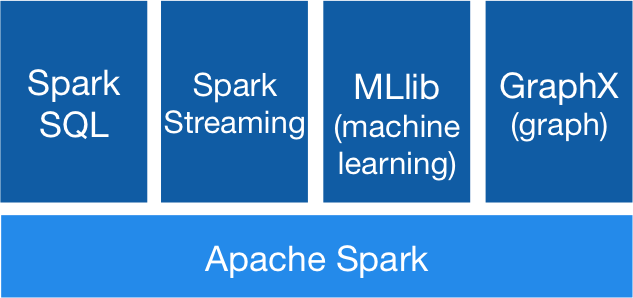

* Spark "core" - podstawa Sparka z podstawową abstrakcją danych nazywaną RDD
* Spark SQL - komponent pozwalający na operowanie na ustrukturyzowanych danych z wykorzystaniem operacji znanych z SQL - łatwy w użyciu
* Spark MLlib - komponent zawierający algorytmy ML dostępne w Sparku - ML na skalę klastrów
* Spark Streaming - moduł pozwalający na pracę ze strumnieniami danych
* Spark GraphX - komponent do pracy z grafami

**Architektura Sparka:**

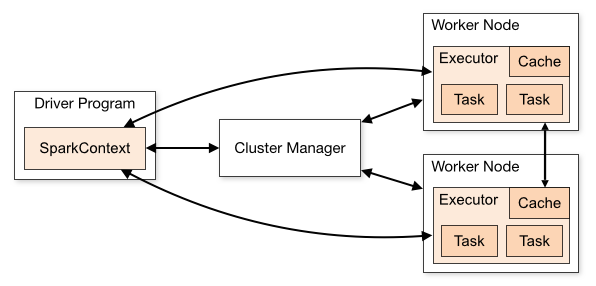

* driver - proces uruchamiający główną funkcję aplikacji i tworzący SparkContext
* executor(y) - proces uruchomiony dla aplikacji w węźle roboczym (worker node), który uruchamia zadania i przechowuje dane w pamięci lub na dysku. Każda aplikacja ma własne executory
* cluster manager - dostępne opcje: YARN, Mesos, Kubernetes, Standalone

**SparkContext:**
* punkt wejścia do pracy ze Sparkiem
* koordynuje procesy na klastrze
* zatrzymanie SparkContextu == zatrzymanie działania aplikacji
* zwykle nazywany `sc`
* kroki niezbędne do utworzenia SparkContextu w pySparku:

> import pyspark

> sc = pyspark.SparkContext(appName="my_app")

**SparkSession:**
* wprowadzony w Spark 2.0
* składa się ze SparkContextu, SQLContextu oraz HiveContext
* zwykle nazywany `spark`
* kroki niezbędne do utworzenia SparkSession w pySparku:

> from pyspark.sql import SparkSession

> spark = SparkSession.builder.appName('my_app').getOrCreate()


**RDD:**
* podstawowa abstrakcja danych w Sparku
* R - resilient
* D - distributed
* D - dataset
* Matei Zharia, et al. `Resilient Distributed Datasets: A Fault-Tolerant Abstraction for In-Memory Cluster Computing`
* immutable
* in-memory
* lazy evaluated
* parallel
* dwa typy operacji: akcje i transformacje
* przykłady użycia:

In [1]:
import pyspark
sc = pyspark.SparkContext(appName="my_app")

In [2]:
sc.parallelize(range(20))\
.map(lambda x: x * 2) \
.filter(lambda x: x != 2) \
.reduce(lambda x,y: x + y)

378

In [3]:
text_input = """Spark is a fast and general processing engine compatible with Hadoop data. 
It can run in Hadoop clusters through YARN or Spark's standalone mode, and it can process data in HDFS, 
HBase, Cassandra, Hive, and any Hadoop InputFormat. It is designed to perform both batch processing 
(similar to MapReduce) and new workloads like streaming, interactive queries, and machine learning."""

sc.parallelize(text_input.split(" ")) \
.map(lambda x: x.lower().strip(",.()")) \
.map(lambda x: (x, 1)) \
.reduceByKey(lambda x,y: x + y) \
.collect()

[('engine', 1),
 ('compatible', 1),
 ('hadoop', 3),
 ('yarn', 1),
 ("spark's", 1),
 ('process', 1),
 ('hdfs', 1),
 ('cassandra', 1),
 ('like', 1),
 ('machine', 1),
 ('learning', 1),
 ('spark', 1),
 ('a', 1),
 ('general', 1),
 ('processing', 2),
 ('through', 1),
 ('standalone', 1),
 ('interactive', 1),
 ('run', 1),
 ('hive', 1),
 ('designed', 1),
 ('fast', 1),
 ('data', 2),
 ('it', 2),
 ('any', 1),
 ('mapreduce', 1),
 ('queries', 1),
 ('\nit', 1),
 ('in', 2),
 ('perform', 1),
 ('both', 1),
 ('and', 5),
 ('to', 2),
 ('batch', 1),
 ('is', 2),
 ('clusters', 1),
 ('mode', 1),
 ('\nhbase', 1),
 ('\n(similar', 1),
 ('new', 1),
 ('streaming', 1),
 ('with', 1),
 ('can', 2),
 ('or', 1),
 ('inputformat', 1),
 ('workloads', 1)]

In [4]:
sc.stop()

**DataFrame:**
* abstrakcja danych z modułu Spark SQL - u podstaw leżą RDD
* immutable
* in-memory
* resilient
* distributed
* parallel
* przechowuje dodatkowe informacje o strukturze danych (schema)
* rozproszona kolekcja wierszy z nazwanymi kolumnami
* optymalizowane przez Catalyst Optymizer
* pozwala na pracę z danymi wykorzysując zapytania znane z SQL/Hive

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import functions as f

spark = SparkSession.builder.appName('my_app').getOrCreate()

In [6]:
spark

**DataFrame - kolekcja wierszy**

In [7]:
dummy_df = spark.createDataFrame([Row(name='Greg', age=32),
                                  Row(name='Bob', age=27),
                                  Row(name='Alice', age=30)])

In [8]:
dummy_df.show()

+-----+---+
| name|age|
+-----+---+
| Greg| 32|
|  Bob| 27|
|Alice| 30|
+-----+---+



In [9]:
dummy_df2 = spark.createDataFrame([Row(name='Bill', age=26),
                                   Row(name='Carol', age=28),
                                   Row(name='Susan', age=25), 
                                   Row(name='Mark', age=None)])

In [10]:
dummy_df2.show()

+-----+----+
| name| age|
+-----+----+
| Bill|  26|
|Carol|  28|
|Susan|  25|
| Mark|null|
+-----+----+



In [11]:
dummy_df.take(3)

[Row(name='Greg', age=32), Row(name='Bob', age=27), Row(name='Alice', age=30)]

**DataFrame - właściwości**

In [12]:
dummy_df.columns

['name', 'age']

In [13]:
dummy_df.dtypes

[('name', 'string'), ('age', 'bigint')]

In [14]:
dummy_df.printSchema()

root
 |-- name: string (nullable = true)
 |-- age: long (nullable = true)



In [15]:
dummy_df.describe().show()

+-------+-----+------------------+
|summary| name|               age|
+-------+-----+------------------+
|  count|    3|                 3|
|   mean| null|29.666666666666668|
| stddev| null| 2.516611478423583|
|    min|Alice|                27|
|    max| Greg|                32|
+-------+-----+------------------+



In [16]:
dummy_df.count()

3

**Sposoby odwoływania się do kolumn**

In [17]:
dummy_df.age

Column<b'age'>

In [18]:
dummy_df["age"]

Column<b'age'>

In [19]:
dummy_df[1]

Column<b'age'>

In [20]:
f.col("age")

Column<b'age'>

In [21]:
"age"

'age'

**Składnia inspirowana SQL**

In [22]:
dummy_df.select("age").show()

+---+
|age|
+---+
| 32|
| 27|
| 30|
+---+



In [23]:
dummy_df.where(dummy_df["age"] > 27).show()

+-----+---+
| name|age|
+-----+---+
| Greg| 32|
|Alice| 30|
+-----+---+



In [24]:
dummy_df.agg(f.avg(dummy_df["age"])).show()

+------------------+
|          avg(age)|
+------------------+
|29.666666666666668|
+------------------+



In [25]:
# lub bardziej SQLowo
dummy_df.select(f.avg(dummy_df["age"])).show()

+------------------+
|          avg(age)|
+------------------+
|29.666666666666668|
+------------------+



In [26]:
dummy_df.selectExpr("avg(age)").show()

+------------------+
|          avg(age)|
+------------------+
|29.666666666666668|
+------------------+



In [27]:
dummy_df.union(dummy_df2).show()

+-----+----+
| name| age|
+-----+----+
| Greg|  32|
|  Bob|  27|
|Alice|  30|
| Bill|  26|
|Carol|  28|
|Susan|  25|
| Mark|null|
+-----+----+



**Zapisywanie wyników**

In [28]:
#dummy_df.write.parquet('path/to/location/dummy_df.parquet')
#dummy_df.write.csv('path/to/location/dummy_df.csv')

In [29]:
dummy_df.write.parquet("p", mode="overwrite")

In [30]:
dummy_df.repartition(1).write.csv('csv', mode="overwrite")

In [31]:
dummy_df.toPandas()

name  age
0   Greg   32
1    Bob   27
2  Alice   30

**Wczytywanie danych**

In [32]:
#parquet_df = spark.read.parquet('path/to/parquet')
#csv_df = spark.read.csv('path/to/csv', header=True, inferSchema=True)

In [33]:
spark.read.parquet("p").show()

+-----+---+
| name|age|
+-----+---+
|Alice| 30|
| Greg| 32|
|  Bob| 27|
+-----+---+



In [34]:
spark.read.parquet("p").explain()

== Physical Plan ==
*(1) ColumnarToRow
+- FileScan parquet [name#249,age#250L] Batched: true, DataFilters: [], Format: Parquet, Location: InMemoryFileIndex[file:/home/patryk/szkolenia/kodolamacz_spark/p], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<name:string,age:bigint>




In [35]:
spark.read.parquet("p").select("age").explain()

== Physical Plan ==
*(1) ColumnarToRow
+- FileScan parquet [age#254L] Batched: true, DataFilters: [], Format: Parquet, Location: InMemoryFileIndex[file:/home/patryk/szkolenia/kodolamacz_spark/p], PartitionFilters: [], PushedFilters: [], ReadSchema: struct<age:bigint>




**Używanie zapytań SQLowych**

https://spark.apache.org/docs/latest/sql-programming-guide.html#compatibility-with-apache-hive

In [36]:
dummy_df.createOrReplaceTempView('dummy_df')

In [37]:
# query zwraca nowy DataFrame
spark.sql('select * from dummy_df').show()

+-----+---+
| name|age|
+-----+---+
| Greg| 32|
|  Bob| 27|
|Alice| 30|
+-----+---+



In [38]:
spark.sql('select name from dummy_df where age > 27').show()

+-----+
| name|
+-----+
| Greg|
|Alice|
+-----+



In [39]:
spark.catalog.dropTempView("dummy_df")

### Przykładowe transformacje z wykorzystaniem API Spark SQL oraz selectów SQLowych

**Tworzenie pokazowych DataFrameów**

In [40]:
import random

In [41]:
random.seed(42)

In [42]:
geo_id = [random.choice(["regA","regB","regC","regD","regE","regF"]) for x in range(400)]

In [43]:
prod_id = [random.choice(["prodA","prodB","prodC","prodD","prodE","prodF",
                          "prodG","prodH","prodI","prodJ","prodK","prodL","prodM"]) for x in range(400)]

In [44]:
value = [random.uniform(1000,10000) for x in range(400)]
value[10] = None
value[17] = None
value[123] = None

In [45]:
df = spark.createDataFrame([Row(prod=p, geo=g, val=v) for p,g,v in zip(prod_id, geo_id, value)])

In [46]:
df.show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



In [47]:
df.createOrReplaceTempView('train_df')

In [48]:
geo_df = spark.createDataFrame([Row(geo_id = "regA", geo_name = "Region A"),
                                Row(geo_id = "regB", geo_name = "Region B"),
                                Row(geo_id = "regC", geo_name = "Region C"),
                                Row(geo_id = "regD", geo_name = "Region D"),
                                Row(geo_id = "regE", geo_name = "Region_E")])

In [49]:
geo_df.show()

+------+--------+
|geo_id|geo_name|
+------+--------+
|  regA|Region A|
|  regB|Region B|
|  regC|Region C|
|  regD|Region D|
|  regE|Region_E|
+------+--------+



In [50]:
geo_df.createOrReplaceTempView("geo_df")

**Select**

In [51]:
df.select("prod").show()

+-----+
| prod|
+-----+
|prodB|
|prodD|
|prodF|
|prodE|
|prodC|
|prodH|
|prodI|
|prodL|
|prodE|
|prodJ|
|prodM|
|prodK|
|prodI|
|prodA|
|prodK|
|prodI|
|prodE|
|prodK|
|prodB|
|prodC|
+-----+
only showing top 20 rows



In [52]:
spark.sql("select prod from train_df").show()

+-----+
| prod|
+-----+
|prodB|
|prodD|
|prodF|
|prodE|
|prodC|
|prodH|
|prodI|
|prodL|
|prodE|
|prodJ|
|prodM|
|prodK|
|prodI|
|prodA|
|prodK|
|prodI|
|prodE|
|prodK|
|prodB|
|prodC|
+-----+
only showing top 20 rows



In [53]:
df.drop("prod").show()

+----+------------------+
| geo|               val|
+----+------------------+
|regF| 3941.612243931777|
|regA| 7851.067371046244|
|regA| 4412.135940077227|
|regF| 7768.088411993063|
|regC| 8487.318566397455|
|regB|3270.4437860414255|
|regB| 1737.156094854783|
|regB|1174.4495834500963|
|regF| 5854.771431302804|
|regA| 9999.170456582882|
|regF|              null|
|regF| 6851.296839248875|
|regE|8031.0974464980545|
|regA| 6865.791897195005|
|regE| 7788.098836535736|
|regD|   9546.5055944439|
|regA|2794.2461412627963|
|regA|              null|
|regA|2371.4411120631135|
|regB|2135.9887738678563|
+----+------------------+
only showing top 20 rows



In [54]:
spark.sql("select geo, val from train_df").show()

+----+------------------+
| geo|               val|
+----+------------------+
|regF| 3941.612243931777|
|regA| 7851.067371046244|
|regA| 4412.135940077227|
|regF| 7768.088411993063|
|regC| 8487.318566397455|
|regB|3270.4437860414255|
|regB| 1737.156094854783|
|regB|1174.4495834500963|
|regF| 5854.771431302804|
|regA| 9999.170456582882|
|regF|              null|
|regF| 6851.296839248875|
|regE|8031.0974464980545|
|regA| 6865.791897195005|
|regE| 7788.098836535736|
|regD|   9546.5055944439|
|regA|2794.2461412627963|
|regA|              null|
|regA|2371.4411120631135|
|regB|2135.9887738678563|
+----+------------------+
only showing top 20 rows



In [55]:
df.select((df["val"]* 2).alias("val2")).show()

+------------------+
|              val2|
+------------------+
| 7883.224487863554|
|15702.134742092489|
| 8824.271880154454|
|15536.176823986127|
| 16974.63713279491|
| 6540.887572082851|
| 3474.312189709566|
|2348.8991669001925|
|11709.542862605607|
|19998.340913165765|
|              null|
| 13702.59367849775|
|16062.194892996109|
| 13731.58379439001|
|15576.197673071472|
|  19093.0111888878|
| 5588.492282525593|
|              null|
| 4742.882224126227|
|4271.9775477357125|
+------------------+
only showing top 20 rows



In [56]:
spark.sql("select val * 2 as val2 from train_df").show()

+------------------+
|              val2|
+------------------+
| 7883.224487863554|
|15702.134742092489|
| 8824.271880154454|
|15536.176823986127|
| 16974.63713279491|
| 6540.887572082851|
| 3474.312189709566|
|2348.8991669001925|
|11709.542862605607|
|19998.340913165765|
|              null|
| 13702.59367849775|
|16062.194892996109|
| 13731.58379439001|
|15576.197673071472|
|  19093.0111888878|
| 5588.492282525593|
|              null|
| 4742.882224126227|
|4271.9775477357125|
+------------------+
only showing top 20 rows



In [57]:
df.selectExpr("val * 2 val2", "val").show()

+------------------+------------------+
|              val2|               val|
+------------------+------------------+
| 7883.224487863554| 3941.612243931777|
|15702.134742092489| 7851.067371046244|
| 8824.271880154454| 4412.135940077227|
|15536.176823986127| 7768.088411993063|
| 16974.63713279491| 8487.318566397455|
| 6540.887572082851|3270.4437860414255|
| 3474.312189709566| 1737.156094854783|
|2348.8991669001925|1174.4495834500963|
|11709.542862605607| 5854.771431302804|
|19998.340913165765| 9999.170456582882|
|              null|              null|
| 13702.59367849775| 6851.296839248875|
|16062.194892996109|8031.0974464980545|
| 13731.58379439001| 6865.791897195005|
|15576.197673071472| 7788.098836535736|
|  19093.0111888878|   9546.5055944439|
| 5588.492282525593|2794.2461412627963|
|              null|              null|
| 4742.882224126227|2371.4411120631135|
|4271.9775477357125|2135.9887738678563|
+------------------+------------------+
only showing top 20 rows



**Group by**

In [58]:
df.groupBy("prod").sum().show()

+-----+------------------+
| prod|          sum(val)|
+-----+------------------+
|prodE| 200344.2097373268|
|prodM|204760.92889267983|
|prodL|180375.40537054362|
|prodI|195882.05155923506|
|prodB|118974.31060099883|
|prodG|204282.66023881637|
|prodC|185378.11884987014|
|prodJ| 153095.6522546324|
|prodA|165984.72898796145|
|prodD|180665.70024676438|
|prodF|144171.53376936007|
|prodK|180674.67991169268|
|prodH| 152223.3690893917|
+-----+------------------+



In [59]:
df.select("*", df.val.alias("val2")).groupBy("prod").sum().show()

+-----+------------------+------------------+
| prod|          sum(val)|         sum(val2)|
+-----+------------------+------------------+
|prodE| 200344.2097373268| 200344.2097373268|
|prodM|204760.92889267983|204760.92889267983|
|prodL|180375.40537054362|180375.40537054362|
|prodI|195882.05155923506|195882.05155923506|
|prodB|118974.31060099883|118974.31060099883|
|prodG|204282.66023881637|204282.66023881637|
|prodC|185378.11884987014|185378.11884987014|
|prodJ| 153095.6522546324| 153095.6522546324|
|prodA|165984.72898796145|165984.72898796145|
|prodD|180665.70024676438|180665.70024676438|
|prodF|144171.53376936007|144171.53376936007|
|prodK|180674.67991169268|180674.67991169268|
|prodH| 152223.3690893917| 152223.3690893917|
+-----+------------------+------------------+



In [60]:
df.select("*", df.val.alias("val2")).groupBy("prod").sum("val2").show()

+-----+------------------+
| prod|         sum(val2)|
+-----+------------------+
|prodE| 200344.2097373268|
|prodM|204760.92889267983|
|prodL|180375.40537054362|
|prodI|195882.05155923506|
|prodB|118974.31060099883|
|prodG|204282.66023881637|
|prodC|185378.11884987014|
|prodJ| 153095.6522546324|
|prodA|165984.72898796145|
|prodD|180665.70024676438|
|prodF|144171.53376936007|
|prodK|180674.67991169268|
|prodH| 152223.3690893917|
+-----+------------------+



In [61]:
spark.sql("select prod, sum(val) from train_df group by prod").show()

+-----+------------------+
| prod|          sum(val)|
+-----+------------------+
|prodE| 200344.2097373268|
|prodM|204760.92889267983|
|prodL|180375.40537054362|
|prodI|195882.05155923506|
|prodB|118974.31060099883|
|prodG|204282.66023881637|
|prodC|185378.11884987014|
|prodJ| 153095.6522546324|
|prodA|165984.72898796145|
|prodD|180665.70024676438|
|prodF|144171.53376936007|
|prodK|180674.67991169268|
|prodH| 152223.3690893917|
+-----+------------------+



In [62]:
df.groupBy("prod","geo").sum().show()

+-----+----+------------------+
| prod| geo|          sum(val)|
+-----+----+------------------+
|prodI|regB|26614.212613234384|
|prodA|regE|29147.939313541443|
|prodB|regF| 15182.29534355441|
|prodD|regE| 50465.05578580951|
|prodK|regB|29187.345750604396|
|prodF|regD|30099.764020475784|
|prodH|regE| 9780.791256960383|
|prodB|regA|15173.427162975999|
|prodD|regF|14644.907916090564|
|prodG|regC|34617.725516208724|
|prodB|regE|30647.927342034312|
|prodK|regF|25307.428539388253|
|prodD|regD|32346.278487783064|
|prodM|regC| 7226.084397656817|
|prodL|regA|32890.519567608215|
|prodM|regD| 18403.31832397603|
|prodG|regF|  33858.2808189527|
|prodF|regE|1084.5768830938393|
|prodE|regF| 46132.38800533221|
|prodI|regC| 31181.94863954508|
+-----+----+------------------+
only showing top 20 rows



In [63]:
spark.sql("select prod, geo, sum(val) from train_df group by 1, 2").show()

+-----+----+------------------+
| prod| geo|          sum(val)|
+-----+----+------------------+
|prodI|regB|26614.212613234384|
|prodA|regE|29147.939313541443|
|prodB|regF| 15182.29534355441|
|prodD|regE| 50465.05578580951|
|prodK|regB|29187.345750604396|
|prodF|regD|30099.764020475784|
|prodH|regE| 9780.791256960383|
|prodB|regA|15173.427162975999|
|prodD|regF|14644.907916090564|
|prodG|regC|34617.725516208724|
|prodB|regE|30647.927342034312|
|prodK|regF|25307.428539388253|
|prodD|regD|32346.278487783064|
|prodM|regC| 7226.084397656817|
|prodL|regA|32890.519567608215|
|prodM|regD| 18403.31832397603|
|prodG|regF|  33858.2808189527|
|prodF|regE|1084.5768830938393|
|prodE|regF| 46132.38800533221|
|prodI|regC| 31181.94863954508|
+-----+----+------------------+
only showing top 20 rows



**Where (filter)**

In [64]:
df.where(df["prod"] != "prodA").show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
+-----+----+------------------+
only showing top 20 rows



In [65]:
df.where(df["prod"] != "prodA").where(f.col("val") > 7000).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodD|regA| 7851.067371046244|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodJ|regA| 9999.170456582882|
|prodI|regE|8031.0974464980545|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regB| 7025.129601579196|
|prodL|regA|7295.1847412153575|
|prodI|regE| 7902.082885206167|
|prodE|regF| 7731.330867597572|
|prodD|regE| 8373.710568799765|
|prodL|regD| 9682.486957306788|
|prodK|regC|  7096.12558165368|
|prodE|regA| 9623.555543853063|
|prodH|regF| 7435.132345445216|
|prodG|regB| 7952.327964561016|
|prodE|regC| 8652.639151799167|
|prodF|regD| 9854.599163632041|
|prodM|regA| 8043.718117249176|
+-----+----+------------------+
only showing top 20 rows



In [66]:
df.where((df["prod"] != "prodA") | (f.col("val") > 7000)).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
+-----+----+------------------+
only showing top 20 rows



In [67]:
spark.sql("select * from train_df where prod != 'prodA'").show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
+-----+----+------------------+
only showing top 20 rows



In [68]:
df.where("prod != 'prodA'").show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
+-----+----+------------------+
only showing top 20 rows



In [69]:
# like
df.where(df.prod.like('%A')).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodA|regA| 6865.791897195005|
|prodA|regC|7215.5297433968235|
|prodA|regA| 6403.704533351597|
|prodA|regA| 2089.495585605836|
|prodA|regA| 8458.365799022124|
|prodA|regE| 8273.792969260803|
|prodA|regC|  8476.57917001543|
|prodA|regD| 5182.376199429085|
|prodA|regB| 5417.392015707275|
|prodA|regA|2075.9926712954757|
|prodA|regD| 1904.734972817117|
|prodA|regB| 4964.219183224092|
|prodA|regB| 4606.366980267458|
|prodA|regF|  8741.49999243562|
|prodA|regE| 6589.245889649337|
|prodA|regD| 4888.257977446953|
|prodA|regA| 6918.943478348161|
|prodA|regA| 5883.342349214755|
|prodA|regD| 9930.314254556977|
|prodA|regD| 5961.385691924227|
+-----+----+------------------+
only showing top 20 rows



In [70]:
spark.sql("select * from train_df where prod like '%A'").show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodA|regA| 6865.791897195005|
|prodA|regC|7215.5297433968235|
|prodA|regA| 6403.704533351597|
|prodA|regA| 2089.495585605836|
|prodA|regA| 8458.365799022124|
|prodA|regE| 8273.792969260803|
|prodA|regC|  8476.57917001543|
|prodA|regD| 5182.376199429085|
|prodA|regB| 5417.392015707275|
|prodA|regA|2075.9926712954757|
|prodA|regD| 1904.734972817117|
|prodA|regB| 4964.219183224092|
|prodA|regB| 4606.366980267458|
|prodA|regF|  8741.49999243562|
|prodA|regE| 6589.245889649337|
|prodA|regD| 4888.257977446953|
|prodA|regA| 6918.943478348161|
|prodA|regA| 5883.342349214755|
|prodA|regD| 9930.314254556977|
|prodA|regD| 5961.385691924227|
+-----+----+------------------+
only showing top 20 rows



> **ZADANIE**:   
>(punkty rozwiąż na dwa sposoby)
1. Oblicz średnią wartość dla produktów A i B w regionach C i D
2. Oblicz maksymalne wartości dla produktu A w podziale na regiony

In [71]:
#1
q = ("select prod, avg(val) from train_df where geo in ('regC', 'regD') and "
     "prod in ('prodA', 'prodB') group by prod")
spark.sql(q).show()

+-----+-----------------+
| prod|         avg(val)|
+-----+-----------------+
|prodB|4553.630978737349|
|prodA|6222.739715655231|
+-----+-----------------+



In [72]:
df.where("geo in ('regC', 'regD')").where("prod in ('prodA', 'prodB')").groupBy("prod").avg("val").show()

+-----+-----------------+
| prod|         avg(val)|
+-----+-----------------+
|prodB|4553.630978737349|
|prodA|6222.739715655231|
+-----+-----------------+



In [73]:
#2
q = "select geo, max(val) from train_df where prod = 'prodA' group by geo"
spark.sql(q).show()

+----+-----------------+
| geo|         max(val)|
+----+-----------------+
|regB|5417.392015707275|
|regD|9930.314254556977|
|regA|8851.447156586826|
|regC| 8476.57917001543|
|regF| 8741.49999243562|
|regE|8273.792969260803|
+----+-----------------+



In [74]:
df.where("prod = 'prodA'").groupBy("geo").max("val").show()

+----+-----------------+
| geo|         max(val)|
+----+-----------------+
|regB|5417.392015707275|
|regD|9930.314254556977|
|regA|8851.447156586826|
|regC| 8476.57917001543|
|regF| 8741.49999243562|
|regE|8273.792969260803|
+----+-----------------+



**Order by**

In [75]:
df.groupBy(["prod","geo"]).sum().orderBy("geo").show()

+-----+----+------------------+
| prod| geo|          sum(val)|
+-----+----+------------------+
|prodA|regA| 60940.39816691554|
|prodE|regA| 63855.75514005184|
|prodI|regA| 4920.170437035049|
|prodG|regA|43771.036041858744|
|prodD|regA| 36200.10333060895|
|prodH|regA| 33347.42827483338|
|prodL|regA|32890.519567608215|
|prodC|regA|27816.734886044538|
|prodM|regA| 58332.29058567657|
|prodJ|regA|31533.652791262455|
|prodB|regA|15173.427162975999|
|prodK|regA| 18766.58576258329|
|prodF|regA|16159.108540624577|
|prodK|regB|29187.345750604396|
|prodC|regB|38666.672730250626|
|prodL|regB|21662.464276897255|
|prodE|regB|27459.596285651714|
|prodF|regB|59628.277439039404|
|prodG|regB|28958.581434979576|
|prodI|regB|26614.212613234384|
+-----+----+------------------+
only showing top 20 rows



In [76]:
df.groupBy(["prod","geo"]).sum().orderBy(f.desc("geo")).show()

+-----+----+------------------+
| prod| geo|          sum(val)|
+-----+----+------------------+
|prodM|regF| 39358.22895358065|
|prodJ|regF| 10868.69055916451|
|prodC|regF|  40786.2878528127|
|prodL|regF| 34801.95264427742|
|prodI|regF| 33386.79162918449|
|prodG|regF|  33858.2808189527|
|prodB|regF| 15182.29534355441|
|prodA|regF| 17349.23531871901|
|prodF|regF| 8300.838039617722|
|prodE|regF| 46132.38800533221|
|prodD|regF|14644.907916090564|
|prodK|regF|25307.428539388253|
|prodH|regF|  42935.7005295204|
|prodF|regE|1084.5768830938393|
|prodH|regE| 9780.791256960383|
|prodM|regE| 19819.93370383333|
|prodL|regE| 19029.99202800422|
|prodA|regE|29147.939313541443|
|prodD|regE| 50465.05578580951|
|prodK|regE| 32551.40312652293|
+-----+----+------------------+
only showing top 20 rows



In [77]:
spark.sql("select prod, geo, sum(val) from train_df group by 1, 2 order by 2").show()

+-----+----+------------------+
| prod| geo|          sum(val)|
+-----+----+------------------+
|prodF|regA|16159.108540624577|
|prodA|regA| 60940.39816691554|
|prodD|regA| 36200.10333060895|
|prodG|regA|43771.036041858744|
|prodJ|regA|31533.652791262455|
|prodE|regA| 63855.75514005184|
|prodH|regA| 33347.42827483338|
|prodL|regA|32890.519567608215|
|prodK|regA| 18766.58576258329|
|prodB|regA|15173.427162975999|
|prodM|regA| 58332.29058567657|
|prodC|regA|27816.734886044538|
|prodI|regA| 4920.170437035049|
|prodG|regB|28958.581434979576|
|prodI|regB|26614.212613234384|
|prodE|regB|27459.596285651714|
|prodJ|regB|22852.827988291472|
|prodF|regB|59628.277439039404|
|prodL|regB|21662.464276897255|
|prodK|regB|29187.345750604396|
+-----+----+------------------+
only showing top 20 rows



**Wiele agregacji + aliasy**

In [78]:
df.groupBy(["prod","geo"]).agg(f.sum("val").alias("val_sum"), f.avg("val").alias("val_avg"), 
                               f.count("*"), f.count("val")).show()

+-----+----+------------------+------------------+--------+----------+
| prod| geo|           val_sum|           val_avg|count(1)|count(val)|
+-----+----+------------------+------------------+--------+----------+
|prodI|regB|26614.212613234384|3802.0303733191977|       7|         7|
|prodA|regE|29147.939313541443| 5829.587862708288|       5|         5|
|prodB|regF| 15182.29534355441|3795.5738358886024|       4|         4|
|prodD|regE| 50465.05578580951| 7209.293683687073|       7|         7|
|prodK|regB|29187.345750604396| 5837.469150120879|       6|         5|
|prodF|regD|30099.764020475784| 6019.952804095157|       5|         5|
|prodH|regE| 9780.791256960383| 3260.263752320128|       3|         3|
|prodB|regA|15173.427162975999| 5057.809054325333|       3|         3|
|prodD|regF|14644.907916090564| 2928.981583218113|       5|         5|
|prodG|regC|34617.725516208724|4327.2156895260905|       8|         8|
|prodB|regE|30647.927342034312| 5107.987890339052|       6|         6|
|prodK

In [79]:
q = ("select prod, geo, sum(val) val_sum, avg(val) val_avg, count(*), count(val) " 
     "from train_df group by prod, geo")
spark.sql(q).show()

+-----+----+------------------+------------------+--------+----------+
| prod| geo|           val_sum|           val_avg|count(1)|count(val)|
+-----+----+------------------+------------------+--------+----------+
|prodI|regB|26614.212613234384|3802.0303733191977|       7|         7|
|prodA|regE|29147.939313541443| 5829.587862708288|       5|         5|
|prodB|regF| 15182.29534355441|3795.5738358886024|       4|         4|
|prodD|regE| 50465.05578580951| 7209.293683687073|       7|         7|
|prodK|regB|29187.345750604396| 5837.469150120879|       6|         5|
|prodF|regD|30099.764020475784| 6019.952804095157|       5|         5|
|prodH|regE| 9780.791256960383| 3260.263752320128|       3|         3|
|prodB|regA|15173.427162975999| 5057.809054325333|       3|         3|
|prodD|regF|14644.907916090564| 2928.981583218113|       5|         5|
|prodG|regC|34617.725516208724|4327.2156895260905|       8|         8|
|prodB|regE|30647.927342034312| 5107.987890339052|       6|         6|
|prodK

> **ZADANIE**:   
>(rozwiąż na dwa sposoby)
1. Oblicz różnicę pomiędzy maksymalną i minimalną wartością dla poszczególnych produktów w regionie F, wynik posortuj po nazwach produktów

In [80]:
q = "select prod, max(val) - min(val) diff from train_df where geo = 'regF' group by prod order by prod"
spark.sql(q).show()

+-----+------------------+
| prod|              diff|
+-----+------------------+
|prodA|133.76466615223217|
|prodB| 3907.428492035288|
|prodC| 5485.512093530397|
|prodD|3396.1362386547144|
|prodE| 2783.599375819109|
|prodF| 6252.675032765779|
|prodG| 5330.644429035772|
|prodH| 6280.533971310151|
|prodI| 8049.488485490163|
|prodJ|3320.6816925386865|
|prodK| 6721.600295962523|
|prodL|  8631.47264521986|
|prodM|   3694.0932108087|
+-----+------------------+



In [81]:
df.where("geo = 'regF'").groupBy("prod").agg((f.max("val") - f.min("val")).alias("diff")).orderBy("prod").show()

+-----+------------------+
| prod|              diff|
+-----+------------------+
|prodA|133.76466615223217|
|prodB| 3907.428492035288|
|prodC| 5485.512093530397|
|prodD|3396.1362386547144|
|prodE| 2783.599375819109|
|prodF| 6252.675032765779|
|prodG| 5330.644429035772|
|prodH| 6280.533971310151|
|prodI| 8049.488485490163|
|prodJ|3320.6816925386865|
|prodK| 6721.600295962523|
|prodL|  8631.47264521986|
|prodM|   3694.0932108087|
+-----+------------------+



**Joiny**

In [82]:
# dostępne: inner, cross, outer, full, full_outer, left, left_outer, right, right_outer, left_semi, i left_anti
df.join(geo_df, df.geo == geo_df.geo_id, "inner").show()

+-----+----+------------------+------+--------+
| prod| geo|               val|geo_id|geo_name|
+-----+----+------------------+------+--------+
|prodH|regB|3270.4437860414255|  regB|Region B|
|prodI|regB| 1737.156094854783|  regB|Region B|
|prodL|regB|1174.4495834500963|  regB|Region B|
|prodC|regB|2135.9887738678563|  regB|Region B|
|prodE|regB| 7025.129601579196|  regB|Region B|
|prodC|regB|2510.1022903102203|  regB|Region B|
|prodF|regB|1972.8887469184592|  regB|Region B|
|prodI|regB| 4569.889973649646|  regB|Region B|
|prodK|regB|1917.1117490137888|  regB|Region B|
|prodG|regB| 7952.327964561016|  regB|Region B|
|prodF|regB| 5843.556158034302|  regB|Region B|
|prodC|regB| 8665.418440173988|  regB|Region B|
|prodF|regB| 8934.680656024948|  regB|Region B|
|prodK|regB| 2636.558714419226|  regB|Region B|
|prodM|regB| 4063.049588478553|  regB|Region B|
|prodM|regB| 7823.481881342198|  regB|Region B|
|prodA|regB| 5417.392015707275|  regB|Region B|
|prodC|regB| 8136.395813190857|  regB|Re

In [83]:
df.join(geo_df, df.geo == geo_df.geo_id, "inner").count()

332

In [84]:
q = """select train_df.prod, train_df.geo, train_df.val, geo_df.geo_name 
from train_df inner join geo_df on train_df.geo == geo_df.geo_id"""
spark.sql(q).show()

+-----+----+------------------+--------+
| prod| geo|               val|geo_name|
+-----+----+------------------+--------+
|prodH|regB|3270.4437860414255|Region B|
|prodI|regB| 1737.156094854783|Region B|
|prodL|regB|1174.4495834500963|Region B|
|prodC|regB|2135.9887738678563|Region B|
|prodE|regB| 7025.129601579196|Region B|
|prodC|regB|2510.1022903102203|Region B|
|prodF|regB|1972.8887469184592|Region B|
|prodI|regB| 4569.889973649646|Region B|
|prodK|regB|1917.1117490137888|Region B|
|prodG|regB| 7952.327964561016|Region B|
|prodF|regB| 5843.556158034302|Region B|
|prodC|regB| 8665.418440173988|Region B|
|prodF|regB| 8934.680656024948|Region B|
|prodK|regB| 2636.558714419226|Region B|
|prodM|regB| 4063.049588478553|Region B|
|prodM|regB| 7823.481881342198|Region B|
|prodA|regB| 5417.392015707275|Region B|
|prodC|regB| 8136.395813190857|Region B|
|prodL|regB|  5778.29738031191|Region B|
|prodC|regB| 7325.694479671921|Region B|
+-----+----+------------------+--------+
only showing top

In [85]:
df.join(geo_df, df.geo == geo_df.geo_id, "outer").show()

+-----+----+------------------+------+--------+
| prod| geo|               val|geo_id|geo_name|
+-----+----+------------------+------+--------+
|prodH|regB|3270.4437860414255|  regB|Region B|
|prodI|regB| 1737.156094854783|  regB|Region B|
|prodL|regB|1174.4495834500963|  regB|Region B|
|prodC|regB|2135.9887738678563|  regB|Region B|
|prodE|regB| 7025.129601579196|  regB|Region B|
|prodC|regB|2510.1022903102203|  regB|Region B|
|prodF|regB|1972.8887469184592|  regB|Region B|
|prodI|regB| 4569.889973649646|  regB|Region B|
|prodK|regB|1917.1117490137888|  regB|Region B|
|prodG|regB| 7952.327964561016|  regB|Region B|
|prodF|regB| 5843.556158034302|  regB|Region B|
|prodC|regB| 8665.418440173988|  regB|Region B|
|prodF|regB| 8934.680656024948|  regB|Region B|
|prodK|regB| 2636.558714419226|  regB|Region B|
|prodM|regB| 4063.049588478553|  regB|Region B|
|prodM|regB| 7823.481881342198|  regB|Region B|
|prodA|regB| 5417.392015707275|  regB|Region B|
|prodC|regB| 8136.395813190857|  regB|Re

In [86]:
df.join(geo_df, df.geo == geo_df.geo_id, "outer").count()

400

In [87]:
q = """select train_df.prod, train_df.geo, train_df.val, geo_df.geo_name 
from train_df full outer join geo_df on train_df.geo == geo_df.geo_id"""
spark.sql(q).show()

+-----+----+------------------+--------+
| prod| geo|               val|geo_name|
+-----+----+------------------+--------+
|prodH|regB|3270.4437860414255|Region B|
|prodI|regB| 1737.156094854783|Region B|
|prodL|regB|1174.4495834500963|Region B|
|prodC|regB|2135.9887738678563|Region B|
|prodE|regB| 7025.129601579196|Region B|
|prodC|regB|2510.1022903102203|Region B|
|prodF|regB|1972.8887469184592|Region B|
|prodI|regB| 4569.889973649646|Region B|
|prodK|regB|1917.1117490137888|Region B|
|prodG|regB| 7952.327964561016|Region B|
|prodF|regB| 5843.556158034302|Region B|
|prodC|regB| 8665.418440173988|Region B|
|prodF|regB| 8934.680656024948|Region B|
|prodK|regB| 2636.558714419226|Region B|
|prodM|regB| 4063.049588478553|Region B|
|prodM|regB| 7823.481881342198|Region B|
|prodA|regB| 5417.392015707275|Region B|
|prodC|regB| 8136.395813190857|Region B|
|prodL|regB|  5778.29738031191|Region B|
|prodC|regB| 7325.694479671921|Region B|
+-----+----+------------------+--------+
only showing top

In [88]:
q = """select train_df.prod, train_df.geo, train_df.val, geo_df.geo_name 
from train_df full outer join geo_df on train_df.geo == geo_df.geo_id"""
spark.sql(q).count()

400

In [89]:
df_tmp = df.withColumnRenamed("geo", "geo_id")
df_tmp.join(geo_df, "geo_id", "inner").show()

+------+-----+------------------+--------+
|geo_id| prod|               val|geo_name|
+------+-----+------------------+--------+
|  regB|prodH|3270.4437860414255|Region B|
|  regB|prodI| 1737.156094854783|Region B|
|  regB|prodL|1174.4495834500963|Region B|
|  regB|prodC|2135.9887738678563|Region B|
|  regB|prodE| 7025.129601579196|Region B|
|  regB|prodC|2510.1022903102203|Region B|
|  regB|prodF|1972.8887469184592|Region B|
|  regB|prodI| 4569.889973649646|Region B|
|  regB|prodK|1917.1117490137888|Region B|
|  regB|prodG| 7952.327964561016|Region B|
|  regB|prodF| 5843.556158034302|Region B|
|  regB|prodC| 8665.418440173988|Region B|
|  regB|prodF| 8934.680656024948|Region B|
|  regB|prodK| 2636.558714419226|Region B|
|  regB|prodM| 4063.049588478553|Region B|
|  regB|prodM| 7823.481881342198|Region B|
|  regB|prodA| 5417.392015707275|Region B|
|  regB|prodC| 8136.395813190857|Region B|
|  regB|prodL|  5778.29738031191|Region B|
|  regB|prodC| 7325.694479671921|Region B|
+------+---

In [90]:
# tak nie robić!
df_tmp.join(geo_df, df_tmp.geo_id == geo_df.geo_id, "inner").show()

+-----+------+------------------+------+--------+
| prod|geo_id|               val|geo_id|geo_name|
+-----+------+------------------+------+--------+
|prodH|  regB|3270.4437860414255|  regB|Region B|
|prodI|  regB| 1737.156094854783|  regB|Region B|
|prodL|  regB|1174.4495834500963|  regB|Region B|
|prodC|  regB|2135.9887738678563|  regB|Region B|
|prodE|  regB| 7025.129601579196|  regB|Region B|
|prodC|  regB|2510.1022903102203|  regB|Region B|
|prodF|  regB|1972.8887469184592|  regB|Region B|
|prodI|  regB| 4569.889973649646|  regB|Region B|
|prodK|  regB|1917.1117490137888|  regB|Region B|
|prodG|  regB| 7952.327964561016|  regB|Region B|
|prodF|  regB| 5843.556158034302|  regB|Region B|
|prodC|  regB| 8665.418440173988|  regB|Region B|
|prodF|  regB| 8934.680656024948|  regB|Region B|
|prodK|  regB| 2636.558714419226|  regB|Region B|
|prodM|  regB| 4063.049588478553|  regB|Region B|
|prodM|  regB| 7823.481881342198|  regB|Region B|
|prodA|  regB| 5417.392015707275|  regB|Region B|


**Distinct**

In [91]:
df.select("prod", "geo").distinct().show()

+-----+----+
| prod| geo|
+-----+----+
|prodI|regB|
|prodA|regE|
|prodB|regF|
|prodD|regE|
|prodK|regB|
|prodF|regD|
|prodH|regE|
|prodB|regA|
|prodD|regF|
|prodG|regC|
|prodB|regE|
|prodK|regF|
|prodD|regD|
|prodM|regC|
|prodL|regA|
|prodM|regD|
|prodG|regF|
|prodF|regE|
|prodE|regF|
|prodI|regC|
+-----+----+
only showing top 20 rows



In [92]:
spark.sql("select distinct prod, geo from train_df").show()

+-----+----+
| prod| geo|
+-----+----+
|prodI|regB|
|prodA|regE|
|prodB|regF|
|prodD|regE|
|prodK|regB|
|prodF|regD|
|prodH|regE|
|prodB|regA|
|prodD|regF|
|prodG|regC|
|prodB|regE|
|prodK|regF|
|prodD|regD|
|prodM|regC|
|prodL|regA|
|prodM|regD|
|prodG|regF|
|prodF|regE|
|prodE|regF|
|prodI|regC|
+-----+----+
only showing top 20 rows



In [93]:
# alternatywnie
df.dropDuplicates(["prod", "geo"]).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodI|regB| 1737.156094854783|
|prodA|regE| 8273.792969260803|
|prodB|regF| 3941.612243931777|
|prodD|regE| 8373.710568799765|
|prodK|regB|1917.1117490137888|
|prodF|regD| 9854.599163632041|
|prodH|regE| 3425.599233703485|
|prodB|regA|2371.4411120631135|
|prodD|regF| 2666.348581938958|
|prodG|regC| 7310.653752989814|
|prodB|regE| 6075.726237370172|
|prodK|regF| 6851.296839248875|
|prodD|regD|1231.1058294771942|
|prodM|regC| 7226.084397656817|
|prodL|regA|7295.1847412153575|
|prodM|regD| 9789.463205947512|
|prodG|regF| 3415.559842443028|
|prodF|regE|1084.5768830938393|
|prodE|regF| 7768.088411993063|
|prodI|regC|3430.7415674866074|
+-----+----+------------------+
only showing top 20 rows



**Usuwanie NULLi**

In [94]:
# "any" or "all"
df.dropna("any").show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
|prodB|regE| 6075.726237370172|
+-----+----+------------------+
only showing top 20 rows



In [95]:
df.dropna("any").count()

397

In [96]:
q = "select * from train_df where val is not null"
spark.sql(q).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
|prodE|regB| 7025.129601579196|
|prodB|regE| 6075.726237370172|
+-----+----+------------------+
only showing top 20 rows



In [97]:
q = "select * from train_df where val is not null"
spark.sql(q).count()

397

In [98]:
df.where(df.val.isNull()).show()

+-----+----+----+
| prod| geo| val|
+-----+----+----+
|prodM|regF|null|
|prodK|regA|null|
|prodK|regB|null|
+-----+----+----+



In [99]:
df.where(f.isnull("val")).show()

+-----+----+----+
| prod| geo| val|
+-----+----+----+
|prodM|regF|null|
|prodK|regA|null|
|prodK|regB|null|
+-----+----+----+



**Zastępowanie NULLi**

In [100]:
df.fillna(1).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|               1.0|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|               1.0|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



In [101]:
df.fillna({"val": 1}).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|               1.0|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|               1.0|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



In [102]:
q = "select prod, geo, if(val is null, 1, val) as val from train_df"
spark.sql(q).show()

+-----+----+------------------+
| prod| geo|               val|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|               1.0|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|               1.0|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



**Podmiana wartości**

In [103]:
df.replace("prodA", "Product A").show()

+---------+----+------------------+
|     prod| geo|               val|
+---------+----+------------------+
|    prodB|regF| 3941.612243931777|
|    prodD|regA| 7851.067371046244|
|    prodF|regA| 4412.135940077227|
|    prodE|regF| 7768.088411993063|
|    prodC|regC| 8487.318566397455|
|    prodH|regB|3270.4437860414255|
|    prodI|regB| 1737.156094854783|
|    prodL|regB|1174.4495834500963|
|    prodE|regF| 5854.771431302804|
|    prodJ|regA| 9999.170456582882|
|    prodM|regF|              null|
|    prodK|regF| 6851.296839248875|
|    prodI|regE|8031.0974464980545|
|Product A|regA| 6865.791897195005|
|    prodK|regE| 7788.098836535736|
|    prodI|regD|   9546.5055944439|
|    prodE|regA|2794.2461412627963|
|    prodK|regA|              null|
|    prodB|regA|2371.4411120631135|
|    prodC|regB|2135.9887738678563|
+---------+----+------------------+
only showing top 20 rows



In [104]:
df.replace({"prodA": "Product A", "prodB": "Product B"}).show()

+---------+----+------------------+
|     prod| geo|               val|
+---------+----+------------------+
|Product B|regF| 3941.612243931777|
|    prodD|regA| 7851.067371046244|
|    prodF|regA| 4412.135940077227|
|    prodE|regF| 7768.088411993063|
|    prodC|regC| 8487.318566397455|
|    prodH|regB|3270.4437860414255|
|    prodI|regB| 1737.156094854783|
|    prodL|regB|1174.4495834500963|
|    prodE|regF| 5854.771431302804|
|    prodJ|regA| 9999.170456582882|
|    prodM|regF|              null|
|    prodK|regF| 6851.296839248875|
|    prodI|regE|8031.0974464980545|
|Product A|regA| 6865.791897195005|
|    prodK|regE| 7788.098836535736|
|    prodI|regD|   9546.5055944439|
|    prodE|regA|2794.2461412627963|
|    prodK|regA|              null|
|Product B|regA|2371.4411120631135|
|    prodC|regB|2135.9887738678563|
+---------+----+------------------+
only showing top 20 rows



In [105]:
spark.sql("select geo, regexp_replace(prod, 'prodA', 'Product A') as prod, val from train_df").show()

+----+---------+------------------+
| geo|     prod|               val|
+----+---------+------------------+
|regF|    prodB| 3941.612243931777|
|regA|    prodD| 7851.067371046244|
|regA|    prodF| 4412.135940077227|
|regF|    prodE| 7768.088411993063|
|regC|    prodC| 8487.318566397455|
|regB|    prodH|3270.4437860414255|
|regB|    prodI| 1737.156094854783|
|regB|    prodL|1174.4495834500963|
|regF|    prodE| 5854.771431302804|
|regA|    prodJ| 9999.170456582882|
|regF|    prodM|              null|
|regF|    prodK| 6851.296839248875|
|regE|    prodI|8031.0974464980545|
|regA|Product A| 6865.791897195005|
|regE|    prodK| 7788.098836535736|
|regD|    prodI|   9546.5055944439|
|regA|    prodE|2794.2461412627963|
|regA|    prodK|              null|
|regA|    prodB|2371.4411120631135|
|regB|    prodC|2135.9887738678563|
+----+---------+------------------+
only showing top 20 rows



> **ZADANIE**:   
>(rozwiąż na dwa sposoby)
1. W dowolny sposób przygotuj df w którym kolumny geo i prod zawierają jedynie litery identyfikujące produkty i regiony

In [106]:
q = "select regexp_replace(geo, 'reg', '') as geo, regexp_replace(prod, 'prod', '') as prod, val from train_df"
spark.sql(q).show()

+---+----+------------------+
|geo|prod|               val|
+---+----+------------------+
|  F|   B| 3941.612243931777|
|  A|   D| 7851.067371046244|
|  A|   F| 4412.135940077227|
|  F|   E| 7768.088411993063|
|  C|   C| 8487.318566397455|
|  B|   H|3270.4437860414255|
|  B|   I| 1737.156094854783|
|  B|   L|1174.4495834500963|
|  F|   E| 5854.771431302804|
|  A|   J| 9999.170456582882|
|  F|   M|              null|
|  F|   K| 6851.296839248875|
|  E|   I|8031.0974464980545|
|  A|   A| 6865.791897195005|
|  E|   K| 7788.098836535736|
|  D|   I|   9546.5055944439|
|  A|   E|2794.2461412627963|
|  A|   K|              null|
|  A|   B|2371.4411120631135|
|  B|   C|2135.9887738678563|
+---+----+------------------+
only showing top 20 rows



In [107]:
df.selectExpr("regexp_replace(geo, 'reg', '') as geo", "regexp_replace(prod, 'prod', '') as prod", "val").show()

+---+----+------------------+
|geo|prod|               val|
+---+----+------------------+
|  F|   B| 3941.612243931777|
|  A|   D| 7851.067371046244|
|  A|   F| 4412.135940077227|
|  F|   E| 7768.088411993063|
|  C|   C| 8487.318566397455|
|  B|   H|3270.4437860414255|
|  B|   I| 1737.156094854783|
|  B|   L|1174.4495834500963|
|  F|   E| 5854.771431302804|
|  A|   J| 9999.170456582882|
|  F|   M|              null|
|  F|   K| 6851.296839248875|
|  E|   I|8031.0974464980545|
|  A|   A| 6865.791897195005|
|  E|   K| 7788.098836535736|
|  D|   I|   9546.5055944439|
|  A|   E|2794.2461412627963|
|  A|   K|              null|
|  A|   B|2371.4411120631135|
|  B|   C|2135.9887738678563|
+---+----+------------------+
only showing top 20 rows



**Zmiana nazw kolumn**

In [108]:
df.withColumnRenamed("val", "volume").show()

+-----+----+------------------+
| prod| geo|            volume|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



In [109]:
df.select(df.val.alias("volume")).show()

+------------------+
|            volume|
+------------------+
| 3941.612243931777|
| 7851.067371046244|
| 4412.135940077227|
| 7768.088411993063|
| 8487.318566397455|
|3270.4437860414255|
| 1737.156094854783|
|1174.4495834500963|
| 5854.771431302804|
| 9999.170456582882|
|              null|
| 6851.296839248875|
|8031.0974464980545|
| 6865.791897195005|
| 7788.098836535736|
|   9546.5055944439|
|2794.2461412627963|
|              null|
|2371.4411120631135|
|2135.9887738678563|
+------------------+
only showing top 20 rows



In [110]:
spark.sql("select prod, geo, val as volume from train_df").show()

+-----+----+------------------+
| prod| geo|            volume|
+-----+----+------------------+
|prodB|regF| 3941.612243931777|
|prodD|regA| 7851.067371046244|
|prodF|regA| 4412.135940077227|
|prodE|regF| 7768.088411993063|
|prodC|regC| 8487.318566397455|
|prodH|regB|3270.4437860414255|
|prodI|regB| 1737.156094854783|
|prodL|regB|1174.4495834500963|
|prodE|regF| 5854.771431302804|
|prodJ|regA| 9999.170456582882|
|prodM|regF|              null|
|prodK|regF| 6851.296839248875|
|prodI|regE|8031.0974464980545|
|prodA|regA| 6865.791897195005|
|prodK|regE| 7788.098836535736|
|prodI|regD|   9546.5055944439|
|prodE|regA|2794.2461412627963|
|prodK|regA|              null|
|prodB|regA|2371.4411120631135|
|prodC|regB|2135.9887738678563|
+-----+----+------------------+
only showing top 20 rows



**Tworzenie nowej kolumny**

In [111]:
df.withColumn("val2", df["val"] / 100).show()

+-----+----+------------------+------------------+
| prod| geo|               val|              val2|
+-----+----+------------------+------------------+
|prodB|regF| 3941.612243931777| 39.41612243931777|
|prodD|regA| 7851.067371046244| 78.51067371046244|
|prodF|regA| 4412.135940077227| 44.12135940077227|
|prodE|regF| 7768.088411993063| 77.68088411993064|
|prodC|regC| 8487.318566397455| 84.87318566397454|
|prodH|regB|3270.4437860414255| 32.70443786041425|
|prodI|regB| 1737.156094854783| 17.37156094854783|
|prodL|regB|1174.4495834500963|11.744495834500963|
|prodE|regF| 5854.771431302804| 58.54771431302804|
|prodJ|regA| 9999.170456582882| 99.99170456582883|
|prodM|regF|              null|              null|
|prodK|regF| 6851.296839248875| 68.51296839248874|
|prodI|regE|8031.0974464980545| 80.31097446498055|
|prodA|regA| 6865.791897195005| 68.65791897195005|
|prodK|regE| 7788.098836535736| 77.88098836535737|
|prodI|regD|   9546.5055944439| 95.46505594443899|
|prodE|regA|2794.2461412627963|

In [112]:
df.withColumn("val2", f.lit(100)).show()

+-----+----+------------------+----+
| prod| geo|               val|val2|
+-----+----+------------------+----+
|prodB|regF| 3941.612243931777| 100|
|prodD|regA| 7851.067371046244| 100|
|prodF|regA| 4412.135940077227| 100|
|prodE|regF| 7768.088411993063| 100|
|prodC|regC| 8487.318566397455| 100|
|prodH|regB|3270.4437860414255| 100|
|prodI|regB| 1737.156094854783| 100|
|prodL|regB|1174.4495834500963| 100|
|prodE|regF| 5854.771431302804| 100|
|prodJ|regA| 9999.170456582882| 100|
|prodM|regF|              null| 100|
|prodK|regF| 6851.296839248875| 100|
|prodI|regE|8031.0974464980545| 100|
|prodA|regA| 6865.791897195005| 100|
|prodK|regE| 7788.098836535736| 100|
|prodI|regD|   9546.5055944439| 100|
|prodE|regA|2794.2461412627963| 100|
|prodK|regA|              null| 100|
|prodB|regA|2371.4411120631135| 100|
|prodC|regB|2135.9887738678563| 100|
+-----+----+------------------+----+
only showing top 20 rows



In [113]:
df.select("*", (df.val/100).alias("val2")).show()

+-----+----+------------------+------------------+
| prod| geo|               val|              val2|
+-----+----+------------------+------------------+
|prodB|regF| 3941.612243931777| 39.41612243931777|
|prodD|regA| 7851.067371046244| 78.51067371046244|
|prodF|regA| 4412.135940077227| 44.12135940077227|
|prodE|regF| 7768.088411993063| 77.68088411993064|
|prodC|regC| 8487.318566397455| 84.87318566397454|
|prodH|regB|3270.4437860414255| 32.70443786041425|
|prodI|regB| 1737.156094854783| 17.37156094854783|
|prodL|regB|1174.4495834500963|11.744495834500963|
|prodE|regF| 5854.771431302804| 58.54771431302804|
|prodJ|regA| 9999.170456582882| 99.99170456582883|
|prodM|regF|              null|              null|
|prodK|regF| 6851.296839248875| 68.51296839248874|
|prodI|regE|8031.0974464980545| 80.31097446498055|
|prodA|regA| 6865.791897195005| 68.65791897195005|
|prodK|regE| 7788.098836535736| 77.88098836535737|
|prodI|regD|   9546.5055944439| 95.46505594443899|
|prodE|regA|2794.2461412627963|

In [114]:
spark.sql("select *, val/100 as val2 from train_df").show()

+-----+----+------------------+------------------+
| prod| geo|               val|              val2|
+-----+----+------------------+------------------+
|prodB|regF| 3941.612243931777| 39.41612243931777|
|prodD|regA| 7851.067371046244| 78.51067371046244|
|prodF|regA| 4412.135940077227| 44.12135940077227|
|prodE|regF| 7768.088411993063| 77.68088411993064|
|prodC|regC| 8487.318566397455| 84.87318566397454|
|prodH|regB|3270.4437860414255| 32.70443786041425|
|prodI|regB| 1737.156094854783| 17.37156094854783|
|prodL|regB|1174.4495834500963|11.744495834500963|
|prodE|regF| 5854.771431302804| 58.54771431302804|
|prodJ|regA| 9999.170456582882| 99.99170456582883|
|prodM|regF|              null|              null|
|prodK|regF| 6851.296839248875| 68.51296839248874|
|prodI|regE|8031.0974464980545| 80.31097446498055|
|prodA|regA| 6865.791897195005| 68.65791897195005|
|prodK|regE| 7788.098836535736| 77.88098836535737|
|prodI|regD|   9546.5055944439| 95.46505594443899|
|prodE|regA|2794.2461412627963|

**When**

In [115]:
df.select(df.prod, f.when(df.val > 7500, 1).when(df.val < 2500, 3).otherwise(2).alias("out")).show()

+-----+---+
| prod|out|
+-----+---+
|prodB|  2|
|prodD|  1|
|prodF|  2|
|prodE|  1|
|prodC|  1|
|prodH|  2|
|prodI|  3|
|prodL|  3|
|prodE|  2|
|prodJ|  1|
|prodM|  2|
|prodK|  2|
|prodI|  1|
|prodA|  2|
|prodK|  1|
|prodI|  1|
|prodE|  2|
|prodK|  2|
|prodB|  3|
|prodC|  3|
+-----+---+
only showing top 20 rows



In [116]:
df.select(df.prod, df.val, f.when(df.val >= 7500, 1).when(df.val >= 2500, 2)\
          .when(df.val < 2500, 3).alias("out")).show()

+-----+------------------+----+
| prod|               val| out|
+-----+------------------+----+
|prodB| 3941.612243931777|   2|
|prodD| 7851.067371046244|   1|
|prodF| 4412.135940077227|   2|
|prodE| 7768.088411993063|   1|
|prodC| 8487.318566397455|   1|
|prodH|3270.4437860414255|   2|
|prodI| 1737.156094854783|   3|
|prodL|1174.4495834500963|   3|
|prodE| 5854.771431302804|   2|
|prodJ| 9999.170456582882|   1|
|prodM|              null|null|
|prodK| 6851.296839248875|   2|
|prodI|8031.0974464980545|   1|
|prodA| 6865.791897195005|   2|
|prodK| 7788.098836535736|   1|
|prodI|   9546.5055944439|   1|
|prodE|2794.2461412627963|   2|
|prodK|              null|null|
|prodB|2371.4411120631135|   3|
|prodC|2135.9887738678563|   3|
+-----+------------------+----+
only showing top 20 rows



In [117]:
q = "select prod, case when val > 7500 then 1 when val < 2500 then 3 else 2 end as out from train_df"
spark.sql(q).show()

+-----+---+
| prod|out|
+-----+---+
|prodB|  2|
|prodD|  1|
|prodF|  2|
|prodE|  1|
|prodC|  1|
|prodH|  2|
|prodI|  3|
|prodL|  3|
|prodE|  2|
|prodJ|  1|
|prodM|  2|
|prodK|  2|
|prodI|  1|
|prodA|  2|
|prodK|  1|
|prodI|  1|
|prodE|  2|
|prodK|  2|
|prodB|  3|
|prodC|  3|
+-----+---+
only showing top 20 rows



**Substring**

In [118]:
df.select(df.prod.substr(2, 4).alias("out")).show()

+----+
| out|
+----+
|rodB|
|rodD|
|rodF|
|rodE|
|rodC|
|rodH|
|rodI|
|rodL|
|rodE|
|rodJ|
|rodM|
|rodK|
|rodI|
|rodA|
|rodK|
|rodI|
|rodE|
|rodK|
|rodB|
|rodC|
+----+
only showing top 20 rows



In [119]:
df.select(f.substring("prod", 2, 4).alias("out")).show()

+----+
| out|
+----+
|rodB|
|rodD|
|rodF|
|rodE|
|rodC|
|rodH|
|rodI|
|rodL|
|rodE|
|rodJ|
|rodM|
|rodK|
|rodI|
|rodA|
|rodK|
|rodI|
|rodE|
|rodK|
|rodB|
|rodC|
+----+
only showing top 20 rows



In [120]:
spark.sql("select substring(prod, 2, 4) as val2 from train_df").show()

+----+
|val2|
+----+
|rodB|
|rodD|
|rodF|
|rodE|
|rodC|
|rodH|
|rodI|
|rodL|
|rodE|
|rodJ|
|rodM|
|rodK|
|rodI|
|rodA|
|rodK|
|rodI|
|rodE|
|rodK|
|rodB|
|rodC|
+----+
only showing top 20 rows



**Funkcje analityczne (window functions)**

In [121]:
from pyspark.sql.window import Window

In [122]:
windowSpec = Window.partitionBy('prod')

df.select("prod", "val", f.sum("val").over(windowSpec).alias("prod_val")).show(50)

+-----+------------------+------------------+
| prod|               val|          prod_val|
+-----+------------------+------------------+
|prodE| 7768.088411993063|200344.20973732683|
|prodE| 5854.771431302804|200344.20973732683|
|prodE|2794.2461412627963|200344.20973732683|
|prodE| 7025.129601579196|200344.20973732683|
|prodE| 6465.227445018385|200344.20973732683|
|prodE| 7731.330867597572|200344.20973732683|
|prodE| 9623.555543853063|200344.20973732683|
|prodE|1683.9683005875395|200344.20973732683|
|prodE| 8652.639151799167|200344.20973732683|
|prodE| 4335.137885962506|200344.20973732683|
|prodE|1779.9660825010696|200344.20973732683|
|prodE| 3977.121674763371|200344.20973732683|
|prodE| 7521.265009837464|200344.20973732683|
|prodE|  5807.21580340897|200344.20973732683|
|prodE| 5980.230701187475|200344.20973732683|
|prodE|1462.3904546522006|200344.20973732683|
|prodE| 8399.040807694873|200344.20973732683|
|prodE| 4984.489036173954|200344.20973732683|
|prodE| 8090.452239820582|200344.2

In [123]:
spark.sql("select prod, val, sum(val) over (partition by prod) as prod_val from train_df").show(50)

+-----+------------------+------------------+
| prod|               val|          prod_val|
+-----+------------------+------------------+
|prodE| 7768.088411993063|200344.20973732683|
|prodE| 5854.771431302804|200344.20973732683|
|prodE|2794.2461412627963|200344.20973732683|
|prodE| 7025.129601579196|200344.20973732683|
|prodE| 6465.227445018385|200344.20973732683|
|prodE| 7731.330867597572|200344.20973732683|
|prodE| 9623.555543853063|200344.20973732683|
|prodE|1683.9683005875395|200344.20973732683|
|prodE| 8652.639151799167|200344.20973732683|
|prodE| 4335.137885962506|200344.20973732683|
|prodE|1779.9660825010696|200344.20973732683|
|prodE| 3977.121674763371|200344.20973732683|
|prodE| 7521.265009837464|200344.20973732683|
|prodE|  5807.21580340897|200344.20973732683|
|prodE| 5980.230701187475|200344.20973732683|
|prodE|1462.3904546522006|200344.20973732683|
|prodE| 8399.040807694873|200344.20973732683|
|prodE| 4984.489036173954|200344.20973732683|
|prodE| 8090.452239820582|200344.2

In [124]:
spark.stop()

### Ćwiczenia

**Importy i przygotowanie danych**

In [125]:
from pyspark.sql import SparkSession
from pyspark.sql import Row
from pyspark.sql import functions as f
from pyspark.sql.window import Window
import random

In [126]:
spark = SparkSession.builder.appName('my_app').master("local[*]").getOrCreate()

https://www.fordgobike.com/system-data

In [127]:
goBike = spark.read.csv("./2017-fordgobike-tripdata.csv", header=True, inferSchema=True)

In [128]:
goBike.printSchema()

root
 |-- duration_sec: integer (nullable = true)
 |-- start_time: string (nullable = true)
 |-- end_time: string (nullable = true)
 |-- start_station_id: integer (nullable = true)
 |-- start_station_name: string (nullable = true)
 |-- start_station_latitude: double (nullable = true)
 |-- start_station_longitude: double (nullable = true)
 |-- end_station_id: integer (nullable = true)
 |-- end_station_name: string (nullable = true)
 |-- end_station_latitude: double (nullable = true)
 |-- end_station_longitude: double (nullable = true)
 |-- bike_id: integer (nullable = true)
 |-- user_type: string (nullable = true)
 |-- member_birth_year: integer (nullable = true)
 |-- member_gender: string (nullable = true)



In [129]:
goBike.show(3, vertical=True)

-RECORD 0---------------------------------------
 duration_sec            | 80110                
 start_time              | 2017-12-31 16:57:... 
 end_time                | 2018-01-01 15:12:... 
 start_station_id        | 74                   
 start_station_name      | Laguna St at Haye... 
 start_station_latitude  | 37.776434819204745   
 start_station_longitude | -122.42624402046204  
 end_station_id          | 43                   
 end_station_name        | San Francisco Pub... 
 end_station_latitude    | 37.7787677           
 end_station_longitude   | -122.4159292         
 bike_id                 | 96                   
 user_type               | Customer             
 member_birth_year       | 1987                 
 member_gender           | Male                 
-RECORD 1---------------------------------------
 duration_sec            | 78800                
 start_time              | 2017-12-31 15:56:... 
 end_time                | 2018-01-01 13:49:... 
 start_station_id   

> **ZADANIE 1**: Zapoznaj się z danymi:
1. Pozbądź się wierszy zawierających NULLe
1. Sprawdź rozkład zmiennej "member_gender"
2. Oblicz minimalny, maksymalny i średni wiek osób wypożyczających rowery
3. Oblicz liczbę unikalnych rowerów
4. Oblicz liczbę unikalnych stacji
5. Sprawdź który rower był wypożyczony najdłużej a który najkrócej w ciągu analizowanego okresu (oraz jak długo)
6. Oblicz średni czas pojedynczego wypożyczenia
7. Sprawdź pomiędzy którymi stacjami występował największy ruch (hint: A -> B == B -> A)
8. Sprawdź o której godzinie w ciągu dnia wypożyczano najwięcej rowerów
9. Sprawdź *średnią liczbę wypożyczeń* dla poszczególnych dni tygodnia (hint: java.text.SimpleDateFormat)
10. **⋆** Oblicz średni dystans (w km) pomiędzy stacją początkową a końcową dla wszystkich wypożyczeń

In [130]:
# 1
goBike = goBike.dropna("any")

In [131]:
goBike.createOrReplaceTempView("goBike")

In [132]:
# 2
goBike.groupBy("member_gender").count().show()

+-------------+------+
|member_gender| count|
+-------------+------+
|       Female| 98542|
|        Other|  6299|
|         Male|348318|
+-------------+------+



In [133]:
q = "select member_gender, count(*) from goBike group by 1"
spark.sql(q).show()

+-------------+--------+
|member_gender|count(1)|
+-------------+--------+
|       Female|   98542|
|        Other|    6299|
|         Male|  348318|
+-------------+--------+



In [134]:
# 3
goBike.select((2017 - goBike["member_birth_year"]).alias("age")) \
.agg(f.min("age").alias("min_age"), f.max("age").alias("max_age"), f.avg("age").alias("avg_age")).show()

+-------+-------+------------------+
|min_age|max_age|           avg_age|
+-------+-------+------------------+
|     18|    131|36.595212717831934|
+-------+-------+------------------+



In [135]:
# lub
goBike.select((2017 - goBike["member_birth_year"]).alias("age")).describe().show()

+-------+------------------+
|summary|               age|
+-------+------------------+
|  count|            453159|
|   mean|36.595212717831934|
| stddev| 10.51348753990845|
|    min|                18|
|    max|               131|
+-------+------------------+



In [136]:
q = ("select max(age), min(age), avg(age) from "
     "(select 2017 - member_birth_year as age from goBike)")
spark.sql(q).show()

+--------+--------+------------------+
|max(age)|min(age)|          avg(age)|
+--------+--------+------------------+
|     131|      18|36.595212717831934|
+--------+--------+------------------+



In [137]:
q = ("select max(2017 - member_birth_year) max_age, min(2017 - member_birth_year) min_age, "
     "avg(2017 - member_birth_year) avg_age from goBike")
spark.sql(q).show()

+-------+-------+------------------+
|max_age|min_age|           avg_age|
+-------+-------+------------------+
|    131|     18|36.595212717831934|
+-------+-------+------------------+



In [138]:
# 4
goBike.select("bike_id").distinct().count()

3670

In [139]:
spark.sql("select count(distinct bike_id) cnt from goBike").show()

+----+
| cnt|
+----+
|3670|
+----+



In [140]:
# 5
goBike.select("start_station_id").union(goBike.select("end_station_id")).distinct().count()

272

In [141]:
q = ("select count(*) from " 
     "(select start_station_id id from goBike " 
     "union " 
     "select end_station_id id from goBike)")

spark.sql(q).show()

+--------+
|count(1)|
+--------+
|     272|
+--------+



In [142]:
# 6
tmax, tmin = goBike.groupBy("bike_id").agg(f.sum("duration_sec").alias("total_time"))\
.select(f.max(f.col("total_time")), f.min(f.col("total_time"))).collect()[0]

tmax, tmin

(377954, 74)

In [143]:
goBike.groupBy("bike_id").agg(f.sum("duration_sec").alias("total_time"))\
.filter(f"total_time = {tmax} or total_time = {tmin}").show()

+-------+----------+
|bike_id|total_time|
+-------+----------+
|   2609|        74|
|   2178|    377954|
+-------+----------+



In [144]:
#alternatywnie
goBike.groupBy("bike_id").agg(f.sum("duration_sec").alias("total_time")).orderBy("total_time").show(1)
goBike.groupBy("bike_id").agg(f.sum("duration_sec").alias("total_time")).orderBy(f.desc("total_time")).show(1)

+-------+----------+
|bike_id|total_time|
+-------+----------+
|   2609|        74|
+-------+----------+
only showing top 1 row

+-------+----------+
|bike_id|total_time|
+-------+----------+
|   2178|    377954|
+-------+----------+
only showing top 1 row



In [145]:
q = "select bike_id, sum(duration_sec) total_time from goBike group by bike_id order by total_time limit 1"
spark.sql(q).show()

+-------+----------+
|bike_id|total_time|
+-------+----------+
|   2609|        74|
+-------+----------+



In [146]:
# 7
goBike.select(f.avg("duration_sec").alias("average")).show()

+-----------------+
|          average|
+-----------------+
|832.9340143305109|
+-----------------+



In [147]:
spark.sql("select avg(duration_sec) average from goBike").show()

+-----------------+
|          average|
+-----------------+
|832.9340143305109|
+-----------------+



In [148]:
# 8
goBike.select(f.when(goBike["start_station_id"] > goBike["end_station_id"], 
                     f.array(goBike["start_station_id"], goBike["end_station_id"]))\
              .otherwise(f.array(goBike["end_station_id"], goBike["start_station_id"])).alias("route"))\
.groupBy("route").count().orderBy(f.desc("count")).show(1)

+-------+-----+
|  route|count|
+-------+-----+
|[15, 6]| 3282|
+-------+-----+
only showing top 1 row



In [149]:
expr = f.when(goBike["start_station_id"] > goBike["end_station_id"], 
                     f.array(goBike["start_station_id"], goBike["end_station_id"]))\
              .otherwise(f.array(goBike["end_station_id"], goBike["start_station_id"]))

goBike.select(expr.alias("route"))\
.groupBy("route").count().orderBy(f.desc("count")).show(1)

+-------+-----+
|  route|count|
+-------+-----+
|[15, 6]| 3282|
+-------+-----+
only showing top 1 row



In [150]:
q = ("select route, count(*) count from "
     "(select case when start_station_id > end_station_id then array(start_station_id, end_station_id) "
     "else array(end_station_id, start_station_id) end route from goBike) "
     "group by route order by count desc")
spark.sql(q).show(1)

+-------+-----+
|  route|count|
+-------+-----+
|[15, 6]| 3282|
+-------+-----+
only showing top 1 row



In [151]:
q1 = ("select case when start_station_id > end_station_id then "
      "array(start_station_id, end_station_id) else array(end_station_id, start_station_id) "
      "end route from goBike")

q = f"select route, count(*) count from ({q1}) group by route order by count desc"
spark.sql(q).show(1)

+-------+-----+
|  route|count|
+-------+-----+
|[15, 6]| 3282|
+-------+-----+
only showing top 1 row



In [152]:
goBike.filter((goBike.start_station_id == 15) | (goBike.start_station_id == 6)) \
.select("start_station_name").distinct().show(truncate=False)

+--------------------------------------------------+
|start_station_name                                |
+--------------------------------------------------+
|San Francisco Ferry Building (Harry Bridges Plaza)|
|The Embarcadero at Sansome St                     |
+--------------------------------------------------+



In [153]:
# 9
goBike.select(f.hour("start_time").alias("hour")).groupBy("hour").count().orderBy(f.desc("count")).show(24)

+----+-----+
|hour|count|
+----+-----+
|   8|54678|
|  17|54620|
|   9|42184|
|  18|41752|
|  16|35478|
|   7|25656|
|  19|23552|
|  15|22491|
|  12|21760|
|  13|21155|
|  10|20999|
|  11|19139|
|  14|18902|
|  20|14628|
|  21|10362|
|   6| 8520|
|  22| 6689|
|  23| 4012|
|   0| 2105|
|   5| 2018|
|   1| 1043|
|   4|  578|
|   2|  578|
|   3|  260|
+----+-----+



In [154]:
# 10
goBike.select(f.date_format("start_time", "dd.MM.yyyy").alias("date"), \
              f.date_format("start_time", "E").alias("weekday")) \
.groupBy("date", "weekday").count() \
.groupBy("weekday").agg(f.avg("count").alias("avg_use")) \
.orderBy("avg_use") \
.show()

+-------+------------------+
|weekday|           avg_use|
+-------+------------------+
|    Sun|1214.3703703703704|
|    Sat|1362.2222222222222|
|    Fri|2667.3333333333335|
|    Mon|2828.3076923076924|
|    Thu| 2859.185185185185|
|    Wed| 2976.185185185185|
|    Tue|3095.4615384615386|
+-------+------------------+



In [155]:
# 11
from math import radians, cos, sin, asin, sqrt
from pyspark.sql.types import FloatType

def haversine(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371 # Radius of earth in kilometers
    return c * r

In [156]:
haversine_udf = f.udf(haversine, FloatType())

In [157]:
goBike.select(haversine_udf("start_station_longitude", "start_station_latitude", \
                            "end_station_longitude", "end_station_latitude").alias("distance")) \
.agg(f.avg("distance").alias("avg_distance")).show()

+------------------+
|      avg_distance|
+------------------+
|1.5993353633302632|
+------------------+



In [158]:
# bez udf
goBike.select(f.radians("start_station_longitude").alias("slong"), 
              f.radians("start_station_latitude").alias("slat"), 
              f.radians("end_station_longitude").alias("elong"), 
              f.radians("end_station_latitude").alias("elat"))\
.select("slat", "elat", (f.col("elong") - f.col("slong")).alias("dlong"), 
        (f.col("elat") - f.col("slat")).alias("dlat"))\
.select((f.sin(f.col("dlat")/2)**2 + f.cos("slat") * f.cos("elat") * f.sin(f.col("dlong")/2)**2).alias("a"))\
.select((f.asin(f.sqrt("a")) * 2 * 6371).alias("distance"))\
.select(f.avg("distance").alias("avg_distance")).show()

+------------------+
|      avg_distance|
+------------------+
|1.5993353642656474|
+------------------+



> **ZADANIE 2**: Utwórz DataFrame `dataDaily` zawierający dane zagregowane do poziomu dnia. Zbiór ma zawierać następujące informacje (kolumny): 
- 'date' : data 
- 'avg_duration_sec' : średni czas wypożyczeń danego dnia
- 'n_trips' : liczba wypożyczeń danego dnia
- 'n_bikes' : liczba unikatowych rowerów użytych danego dnia
- 'n_routes' : liczba unikatowych kombinacji stacji (x -> y == y -> x) danego dnia
- 'n_subscriber' : liczba wypożyczeń dokonanych przez subskrybentów danego dnia

In [159]:
dailyData = goBike.withColumn("date", f.date_format("start_time", "dd.MM.yyyy")) \
.groupBy("date") \
.agg(f.avg("duration_sec").alias("avg_duration_sec"), 
     f.count("*").alias("n_trips"), 
     f.countDistinct("bike_id").alias("n_bikes"), 
     f.sum(f.when(goBike.user_type == "Subscriber", 1).otherwise(0)).alias("n_subscriber"))

In [160]:
tmp = goBike.select(f.date_format("start_time", "dd.MM.yyyy").alias("date"), 
                    f.when(goBike["start_station_id"] > goBike["end_station_id"], 
                           f.array(goBike["start_station_id"], goBike["end_station_id"]))\
                    .otherwise(f.array(goBike["end_station_id"], goBike["start_station_id"])).alias("route"))\
.groupBy("date").agg(f.countDistinct("route").alias("n_routes"))

In [161]:
dailyData = dailyData.join(tmp, "date")
dailyData.show()

+----------+------------------+-------+-------+------------+--------+
|      date|  avg_duration_sec|n_trips|n_bikes|n_subscriber|n_routes|
+----------+------------------+-------+-------+------------+--------+
|16.07.2017| 1499.070351758794|    597|    348|         365|     337|
|16.09.2017|1082.6267255659857|   1811|    967|        1338|    1107|
|25.08.2017| 866.1508559201142|   2804|   1095|        2491|    1483|
|17.08.2017| 848.3041328152597|   2831|   1022|        2478|    1349|
|06.12.2017| 735.2794834307992|   4104|   1508|        3857|    1985|
|16.08.2017| 789.2690124858116|   2643|    985|        2386|    1226|
|03.08.2017| 836.0687193217314|   2241|    911|        2009|    1009|
|19.11.2017|1010.2274881516588|   1477|    862|        1206|     985|
|02.11.2017| 731.0285856326125|   4023|   1368|        3718|    1976|
|28.10.2017| 973.5707940033315|   1801|    951|        1446|    1098|
|10.12.2017| 966.4126394052045|   1614|    932|        1400|    1062|
|24.09.2017|1087.540

**Przygotowanie danych**

In [162]:
random.seed(42)
geo_id = [random.choice(["regA","regB","regC","regD","regE","regF"]) for x in range(400)]
prod_id = [random.choice(["prodA","prodB","prodC","prodD","prodE","prodF",
                          "prodG","prodH","prodI","prodJ","prodK","prodL","prodM"]) for x in range(400)]
date = [random.choice(["2015-","2016-","2017-"]) + 
        random.choice(["01-","02-","03-","04-","05-","06-","07-","08-","09-","10-","11-","12-"]) + "01"
        for x in range(400)]
value = [random.uniform(10000,100000) for x in range(400)]
volume = [random.uniform(1000,10000) for x in range(400)]

In [163]:
df = spark.createDataFrame([Row(prod=p, geo=g, val=v, vol=vl, dt=d) 
                            for p,g,v,vl,d in zip(prod_id, geo_id, value, volume, date)])

In [164]:
df.printSchema()

root
 |-- prod: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- val: double (nullable = true)
 |-- vol: double (nullable = true)
 |-- dt: string (nullable = true)



In [165]:
df = df.withColumn("dt", f.to_date(df["dt"]))

In [166]:
df.printSchema()

root
 |-- prod: string (nullable = true)
 |-- geo: string (nullable = true)
 |-- val: double (nullable = true)
 |-- vol: double (nullable = true)
 |-- dt: date (nullable = true)



In [167]:
df.createOrReplaceTempView("df")

In [168]:
df.show()

+-----+----+------------------+------------------+----------+
| prod| geo|               val|               vol|        dt|
+-----+----+------------------+------------------+----------+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|
|prodE|regF|  53108.3719898527| 5887.276278887673|2017-01-01|
|prodJ|regA| 46145.55290613044|3279.8238868235567|2015-04-01|
|prodM|regF| 71748.77464560093| 7779.618269369784|2015-01-01|
|prodK|regF|54124.196872980276| 2719.930876605198|2017-03-01|
|prodI|regE| 91873.07462037064| 4212.767584318271|2015-03-01|
|prodA|r

> **ZADANIE 3:**
1. Oblicz (globalną) średnią cenę produktów
2. Oblicz wartość całkowitą dla regionów per miesiąc
3. Oblicz udział wolumenu kombinacji region-produkt w całkowitym wolumenie produktu (jaka część całkowitego wolumenu danego produktu generowana jest w danym regionie)
5. Stwórz kolumnę `flag` zwierającą wartość `True` gdy nazwy regionu i produktu kończą się na tą samą literę - wartość `False` w każdym innym przypadku (nadpisz df aby zawierał nową kolumnę)
6. Oblicz iloczyn wartości i wolumenu gdy kolumna `flag` ma wartość `True`, w przeciwnym przypadku zwróć wartość 0 
7. Stwórz kolumnę z rokiem wyciągniętym z daty

In [169]:
# 1
df.select("prod", (f.col("val") / f.col("vol")).alias("price")).groupBy("prod").avg("price").show()

+-----+------------------+
| prod|        avg(price)|
+-----+------------------+
|prodE|13.003190705582222|
|prodM|14.276176474885844|
|prodL|14.374142503409898|
|prodI|12.722073152450685|
|prodB|10.769994221583795|
|prodG|10.120642949425966|
|prodC|15.624764502038504|
|prodJ|10.624728857970478|
|prodA|12.853589975875606|
|prodD|13.082719610930413|
|prodF| 16.20856141297991|
|prodK|  12.9334830775893|
|prodH|12.123463932663862|
+-----+------------------+



In [170]:
# lub
df.groupBy("prod").agg((f.sum("val") / f.sum("vol")).alias("avg_price")).show()

+-----+------------------+
| prod|         avg_price|
+-----+------------------+
|prodE|10.596740956017014|
|prodM| 8.984926712571898|
|prodL| 9.756405163310063|
|prodI|10.250241267017557|
|prodB| 8.724278741882719|
|prodG| 8.588064952655223|
|prodC|10.546984778631952|
|prodJ| 8.385324801472496|
|prodA| 9.905379028611254|
|prodD| 8.433852991485772|
|prodF|10.578212112680163|
|prodK| 9.338780665602892|
|prodH|  9.24187002799949|
+-----+------------------+



In [171]:
spark.sql("select prod, sum(val)/sum(vol) as avg_price from df group by prod").show()

+-----+------------------+
| prod|         avg_price|
+-----+------------------+
|prodE|10.596740956017014|
|prodM| 8.984926712571898|
|prodL| 9.756405163310063|
|prodI|10.250241267017557|
|prodB| 8.724278741882719|
|prodG| 8.588064952655223|
|prodC|10.546984778631952|
|prodJ| 8.385324801472496|
|prodA| 9.905379028611254|
|prodD| 8.433852991485772|
|prodF|10.578212112680163|
|prodK| 9.338780665602892|
|prodH|  9.24187002799949|
+-----+------------------+



In [172]:
# 2
# poprawne w przypadku tych danych
df.groupBy("geo", "dt").agg(f.sum("val").alias("total_val")).orderBy("geo", "dt").show()

+----+----------+------------------+
| geo|        dt|         total_val|
+----+----------+------------------+
|regA|2015-01-01| 76166.82863310802|
|regA|2015-02-01|155261.15709983977|
|regA|2015-03-01|163084.09896991577|
|regA|2015-04-01| 97789.60220958495|
|regA|2015-05-01|  148582.374710774|
|regA|2015-06-01|123526.96146645347|
|regA|2015-07-01|121993.10654308298|
|regA|2015-08-01|  99556.6117479058|
|regA|2015-09-01| 91570.84274473095|
|regA|2015-10-01|210166.80806373555|
|regA|2015-11-01| 57471.38096153344|
|regA|2015-12-01|111841.62910877481|
|regA|2016-02-01| 50814.90126167026|
|regA|2016-03-01|113431.95468646797|
|regA|2016-04-01| 39926.67475347864|
|regA|2016-05-01|247362.35939429235|
|regA|2016-06-01|196490.67133782775|
|regA|2016-07-01| 76491.63986398441|
|regA|2016-08-01|100456.22453586152|
|regA|2016-09-01|111773.61490563425|
+----+----------+------------------+
only showing top 20 rows



In [173]:
# poprawne w ogólności
df.withColumn("dt", f.date_format("dt", "yyyy.MM")).groupBy("geo", "dt")\
.agg(f.sum("val").alias("total_val")).orderBy("geo", "dt").show()

+----+-------+------------------+
| geo|     dt|         total_val|
+----+-------+------------------+
|regA|2015.01| 76166.82863310802|
|regA|2015.02|155261.15709983977|
|regA|2015.03|163084.09896991577|
|regA|2015.04| 97789.60220958495|
|regA|2015.05|  148582.374710774|
|regA|2015.06|123526.96146645347|
|regA|2015.07|121993.10654308298|
|regA|2015.08|  99556.6117479058|
|regA|2015.09| 91570.84274473095|
|regA|2015.10|210166.80806373555|
|regA|2015.11| 57471.38096153344|
|regA|2015.12|111841.62910877481|
|regA|2016.02| 50814.90126167026|
|regA|2016.03|113431.95468646797|
|regA|2016.04| 39926.67475347864|
|regA|2016.05|247362.35939429235|
|regA|2016.06|196490.67133782775|
|regA|2016.07| 76491.63986398441|
|regA|2016.08|100456.22453586152|
|regA|2016.09|111773.61490563425|
+----+-------+------------------+
only showing top 20 rows



In [174]:
spark.sql("select geo, dt, sum(val) as total_val from df group by geo, dt order by 1, 2").show()

+----+----------+------------------+
| geo|        dt|         total_val|
+----+----------+------------------+
|regA|2015-01-01| 76166.82863310802|
|regA|2015-02-01|155261.15709983977|
|regA|2015-03-01|163084.09896991577|
|regA|2015-04-01| 97789.60220958495|
|regA|2015-05-01|  148582.374710774|
|regA|2015-06-01|123526.96146645347|
|regA|2015-07-01|121993.10654308298|
|regA|2015-08-01|  99556.6117479058|
|regA|2015-09-01| 91570.84274473095|
|regA|2015-10-01|210166.80806373555|
|regA|2015-11-01| 57471.38096153344|
|regA|2015-12-01|111841.62910877481|
|regA|2016-02-01| 50814.90126167026|
|regA|2016-03-01|113431.95468646797|
|regA|2016-04-01| 39926.67475347864|
|regA|2016-05-01|247362.35939429235|
|regA|2016-06-01|196490.67133782775|
|regA|2016-07-01| 76491.63986398441|
|regA|2016-08-01|100456.22453586152|
|regA|2016-09-01|111773.61490563425|
+----+----------+------------------+
only showing top 20 rows



In [175]:
# 3
wndw = Window.partitionBy("prod")

df.groupBy("prod", "geo").agg(f.sum("vol").alias("prod_geo_vol"))\
.withColumn("prod_vol", f.sum("prod_geo_vol").over(wndw))\
.withColumn("ratio", f.round(f.col("prod_geo_vol") / f.col("prod_vol") * 100, 2))\
.withColumn("ratio_pretty",
            f.concat(f.round(f.col("prod_geo_vol") / f.col("prod_vol") * 100, 2).cast("string"), f.lit("%")))\
.show()

+-----+----+------------------+------------------+-----+------------+
| prod| geo|      prod_geo_vol|          prod_vol|ratio|ratio_pretty|
+-----+----+------------------+------------------+-----+------------+
|prodE|regF|45626.348915020906|184158.57124386227|24.78|      24.78%|
|prodE|regB| 29266.72538672742|184158.57124386227|15.89|      15.89%|
|prodE|regD|16189.072187292655|184158.57124386227| 8.79|       8.79%|
|prodE|regC| 9562.599738735049|184158.57124386227| 5.19|       5.19%|
|prodE|regA|56972.673496617695|184158.57124386227|30.94|      30.94%|
|prodE|regE| 26541.15151946855|184158.57124386227|14.41|      14.41%|
|prodM|regC| 7406.281936064914|202986.63483985714| 3.65|       3.65%|
|prodM|regD| 16226.56288030393|202986.63483985714| 7.99|       7.99%|
|prodM|regA| 60681.85156695515|202986.63483985714|29.89|      29.89%|
|prodM|regB|63458.168881366684|202986.63483985714|31.26|      31.26%|
|prodM|regE|10466.021919063438|202986.63483985714| 5.16|       5.16%|
|prodM|regF| 44747.7

In [176]:
q = ("select prod, geo, prod_geo_vol, sum(prod_geo_vol) over (partition by prod) as prod_vol, "
     "(prod_geo_vol / sum(prod_geo_vol) over (partition by prod)) as ratio from " 
     "(select prod, geo, sum(vol) as prod_geo_vol from df group by prod, geo)")
spark.sql(q).show()

+-----+----+------------------+------------------+-------------------+
| prod| geo|      prod_geo_vol|          prod_vol|              ratio|
+-----+----+------------------+------------------+-------------------+
|prodE|regF|45626.348915020906|184158.57124386227|0.24775577159861117|
|prodE|regB| 29266.72538672742|184158.57124386227|0.15892133170371148|
|prodE|regD|16189.072187292655|184158.57124386227|0.08790832855591137|
|prodE|regC| 9562.599738735049|184158.57124386227|0.05192590100013472|
|prodE|regA|56972.673496617695|184158.57124386227|0.30936748212047455|
|prodE|regE| 26541.15151946855|184158.57124386227|0.14412118502115673|
|prodM|regC| 7406.281936064914|202986.63483985714|0.03648654967805134|
|prodM|regD| 16226.56288030393|202986.63483985714|0.07993907033882108|
|prodM|regA| 60681.85156695515|202986.63483985714| 0.2989450591898775|
|prodM|regB|63458.168881366684|202986.63483985714| 0.3126223996541986|
|prodM|regE|10466.021919063438|202986.63483985714|0.05156015285105065|
|prodM

In [177]:
# 4
df = df.withColumn("flag", df.prod.substr(-1,1) == df.geo.substr(-1,1))
df.show()

+-----+----+------------------+------------------+----------+-----+
| prod| geo|               val|               vol|        dt| flag|
+-----+----+------------------+------------------+----------+-----+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|
|prodE|regF|  53108.3719898527| 5887.276278887673|2017-01-01|false|
|prodJ|regA| 46145.55290613044|3279.8238868235567|2015-04-01|false|
|prodM|regF| 71748.77464560093| 7779.618269369784|2015-01-01|false|
|prodK|regF|54124.196872980276| 2719.93087660519

In [178]:
q = "select *, substring(prod,5,1) == substring(geo,4,1) as flag from df"
df = spark.sql(q)
df.createOrReplaceTempView("df")
df.show()

+-----+----+------------------+------------------+----------+-----+
| prod| geo|               val|               vol|        dt| flag|
+-----+----+------------------+------------------+----------+-----+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|
|prodE|regF|  53108.3719898527| 5887.276278887673|2017-01-01|false|
|prodJ|regA| 46145.55290613044|3279.8238868235567|2015-04-01|false|
|prodM|regF| 71748.77464560093| 7779.618269369784|2015-01-01|false|
|prodK|regF|54124.196872980276| 2719.93087660519

In [179]:
# 5 
df.withColumn("product", df.val * df.vol * f.when(df.flag, 1).otherwise(0)).show()

+-----+----+------------------+------------------+----------+-----+-------------------+
| prod| geo|               val|               vol|        dt| flag|            product|
+-----+----+------------------+------------------+----------+-----+-------------------+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|                0.0|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|                0.0|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|                0.0|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|                0.0|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true| 7.84021865997798E7|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|                0.0|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|                0.0|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|                0.0|
|prodE|regF|  53108.3719898527| 

In [180]:
spark.sql("select *, val * vol * cast(flag as int) as product from df").show()

+-----+----+------------------+------------------+----------+-----+-------------------+
| prod| geo|               val|               vol|        dt| flag|            product|
+-----+----+------------------+------------------+----------+-----+-------------------+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|                0.0|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|                0.0|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|                0.0|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|                0.0|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true| 7.84021865997798E7|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|                0.0|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|                0.0|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|                0.0|
|prodE|regF|  53108.3719898527| 

In [181]:
# 6
df.withColumn("year", f.year("dt")).show()
# lub
df.withColumn("year", df.dt.cast("string").substr(1,4)).show()

+-----+----+------------------+------------------+----------+-----+----+
| prod| geo|               val|               vol|        dt| flag|year|
+-----+----+------------------+------------------+----------+-----+----+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|2016|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|2016|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|2016|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|2015|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true|2015|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|2017|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|2016|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|2017|
|prodE|regF|  53108.3719898527| 5887.276278887673|2017-01-01|false|2017|
|prodJ|regA| 46145.55290613044|3279.8238868235567|2015-04-01|false|2015|
|prodM|regF| 71748.77464560093| 7779.618269369784|2

In [182]:
spark.sql("select *, substring(cast(dt as string),1,4) as year from df").show()

+-----+----+------------------+------------------+----------+-----+----+
| prod| geo|               val|               vol|        dt| flag|year|
+-----+----+------------------+------------------+----------+-----+----+
|prodB|regF| 95087.40786730956| 5119.116197026179|2016-06-01|false|2016|
|prodD|regA|13902.853320925453| 3640.983140575281|2016-05-01|false|2016|
|prodF|regA| 80490.42963823416| 1394.256480932108|2016-05-01|false|2016|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|2015|
|prodC|regC| 56930.60932417757| 1377.153477373438|2015-12-01| true|2015|
|prodH|regB|51223.826988791385| 9400.338819553575|2017-01-01|false|2017|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|2016|
|prodL|regB|15474.286674505525|  9902.10432066511|2017-02-01|false|2017|
|prodE|regF|  53108.3719898527| 5887.276278887673|2017-01-01|false|2017|
|prodJ|regA| 46145.55290613044|3279.8238868235567|2015-04-01|false|2015|
|prodM|regF| 71748.77464560093| 7779.618269369784|2

### Zaawansowane operacje na oknach

**Ranking**

In [183]:
windowSpec = Window.partitionBy("prod").orderBy("dt")

df.withColumn("ranked", f.rank().over(windowSpec))\
.withColumn("ranked_d", f.dense_rank().over(windowSpec))\
.withColumn("row_num", f.row_number().over(windowSpec)).show(50)

+-----+----+------------------+------------------+----------+-----+------+--------+-------+
| prod| geo|               val|               vol|        dt| flag|ranked|ranked_d|row_num|
+-----+----+------------------+------------------+----------+-----+------+--------+-------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|     1|       1|      1|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|     1|       1|      2|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|     3|       2|      3|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|     3|       2|      4|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|     5|       3|      5|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false|     5|       3|      6|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false|     7|       4|      7|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false|     7|      

In [184]:
q = "select *, rank() over (partition by prod order by dt) as ranked from df"
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+------+
| prod| geo|               val|               vol|        dt| flag|ranked|
+-----+----+------------------+------------------+----------+-----+------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|     1|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|     1|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|     3|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|     3|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|     5|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false|     5|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false|     7|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false|     7|
|prodE|regF| 88028.28169838544| 2795.228503436695|2015-08-01|false|     9|
|prodE|regB| 72585.03267964575| 5445.211783076373|2015-08-01|false|     9|
|prodE|regF| 77231.271108

**Różnica od pierwszej wartości**

In [185]:
windowSpec = Window.partitionBy("prod").orderBy("dt")

df.withColumn("diff_from_first", df.val - f.first(df.val).over(windowSpec)).show(50)

+-----+----+------------------+------------------+----------+-----+-------------------+
| prod| geo|               val|               vol|        dt| flag|    diff_from_first|
+-----+----+------------------+------------------+----------+-----+-------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|                0.0|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true| -10378.29022259303|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|-33893.457770465844|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false| -38608.93070592386|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|  170.2660352937819|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false|-21516.098365691447|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 12903.816850406278|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| -33183.97164476408|
|prodE|regF| 88028.28169838544| 

In [186]:
q = "select *, val - first(val) over (partition by prod order by dt) as diff_from_first from df"
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+-------------------+
| prod| geo|               val|               vol|        dt| flag|    diff_from_first|
+-----+----+------------------+------------------+----------+-----+-------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|                0.0|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true| -10378.29022259303|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|-33893.457770465844|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false| -38608.93070592386|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|  170.2660352937819|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false|-21516.098365691447|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 12903.816850406278|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| -33183.97164476408|
|prodE|regF| 88028.28169838544| 

**Średnia ruchoma**

In [187]:
windowSpec = Window.partitionBy("prod").orderBy("dt").rowsBetween(-1,1)

df.withColumn("moving_avg", f.avg(df.val).over(windowSpec)).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|        moving_avg|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false| 67971.00255784944|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true| 58402.89833812633|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false| 45533.25476948504|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false| 49049.44018878064|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false| 53175.22665703878|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 70346.14250914882|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 59228.06328246286|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 71356.14074743986|
|prodE|regF| 88028.28169838544| 2795.228503

In [188]:
q = """select *, 
avg(val) over (partition by prod order by dt rows between 1 preceding and 1 following) as moving_avg from df"""
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|        moving_avg|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false| 67971.00255784944|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true| 58402.89833812633|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false| 45533.25476948504|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false| 49049.44018878064|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false| 53175.22665703878|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 70346.14250914882|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 59228.06328246286|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 71356.14074743986|
|prodE|regF| 88028.28169838544| 2795.228503

**Suma od pierwszego do bierzącego rekordu**

In [189]:
windowSpec = Window.partitionBy("prod").orderBy("dt")

df.withColumn("sum_from_start", f.sum(df.val).over(windowSpec)).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|    sum_from_start|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|135942.00511569888|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|135942.00511569888|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|209759.91197760106|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|209759.91197760106|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false| 334734.3749854953|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 334734.3749854953|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 460774.5155294294|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 460774.5155294294|
|prodE|regF| 88028.28169838544| 2795.228503

In [190]:
q = "select *, sum(val) over (partition by prod order by dt) as sum_from_start from df"
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|    sum_from_start|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false|135942.00511569888|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|135942.00511569888|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|209759.91197760106|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|209759.91197760106|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false| 334734.3749854953|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 334734.3749854953|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false| 460774.5155294294|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 460774.5155294294|
|prodE|regF| 88028.28169838544| 2795.228503

In [191]:
# inne podejście
windowSpec = Window.partitionBy("prod").orderBy("dt").rowsBetween(Window.unboundedPreceding, Window.currentRow)

df.withColumn("sum_from_start", f.sum(df.val).over(windowSpec)).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|    sum_from_start|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false| 73160.14766914595|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|135942.00511569888|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|  175208.695014379|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|209759.91197760106|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|283090.32568204077|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 334734.3749854953|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false|420798.33950504754|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 460774.5155294294|
|prodE|regF| 88028.28169838544| 2795.228503

In [192]:
q = """select *, sum(val) over (partition by prod order by dt rows between 
unbounded preceding and current row) as sum_from_start from df"""
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+------------------+
| prod| geo|               val|               vol|        dt| flag|    sum_from_start|
+-----+----+------------------+------------------+----------+-----+------------------+
|prodE|regF| 73160.14766914595|5673.4826818144775|2015-02-01|false| 73160.14766914595|
|prodE|regE|62781.857446552924| 4269.800175858841|2015-02-01| true|135942.00511569888|
|prodE|regB| 39266.68989868011|  9051.73745459548|2015-03-01|false|  175208.695014379|
|prodE|regB| 34551.21696322209| 6022.779857266637|2015-03-01|false|209759.91197760106|
|prodE|regC| 73330.41370443974| 2637.668228969236|2015-04-01|false|283090.32568204077|
|prodE|regA| 51644.04930345451| 3814.434287760457|2015-04-01|false| 334734.3749854953|
|prodE|regA| 86063.96451955223|3246.5048778405817|2015-07-01|false|420798.33950504754|
|prodE|regF| 39976.17602438187| 8427.126405939689|2015-07-01|false| 460774.5155294294|
|prodE|regF| 88028.28169838544| 2795.228503

> **ZADANIE 4:**
1. Pogrupuj dane po dacie i produkcie po czym porównaj wolumen produktów ze średnim wolumenem z trzech wcześniejszych okresów
2. Stwórz kolumnę z rankingiem opartm na dacie dla kombinacji produkt-region
3. Oblicz różnicę w wolumenie pomiędzy następującymi po sobie datami dla regionów
4. Oblicz różnicę rok do roku w wartości i wolumenie dla produktów
5. Oblicz udział w całkowitej wartości poszczególnych produktów w danym roku dla każdego regionu

In [193]:
# 1
windowSpec = Window.partitionBy("prod").orderBy("dt").rowsBetween(-3,-1)

df.groupBy("dt", "prod").agg(f.sum("vol").alias("vol"))\
.withColumn("avg_past_3", f.avg(f.col("vol")).over(windowSpec))\
.withColumn("diff_avg_past_3", f.col("vol") - f.avg(f.col("vol")).over(windowSpec)).show()

+----------+-----+------------------+------------------+-------------------+
|        dt| prod|               vol|        avg_past_3|    diff_avg_past_3|
+----------+-----+------------------+------------------+-------------------+
|2015-02-01|prodE| 9943.282857673319|              null|               null|
|2015-03-01|prodE|15074.517311862117| 9943.282857673319|  5131.234454188798|
|2015-04-01|prodE| 6452.102516729694|12508.900084767718| -6056.797568038024|
|2015-07-01|prodE| 11673.63128378027|10489.967562088377| 1183.6637216918934|
|2015-08-01|prodE| 8240.440286513069|11066.750370790694|-2826.3100842776257|
|2015-11-01|prodE|13015.849105930563| 8788.724695674346|  4227.124410256218|
|2015-12-01|prodE| 4173.033792776341|10976.640225407968| -6803.606432631626|
|2016-02-01|prodE|  6948.27299312323| 8476.441061739992| -1528.168068616762|
|2016-05-01|prodE| 7465.265966011938| 8045.718630610046| -580.4526645981077|
|2016-06-01|prodE|2249.8918483452917|  6195.52425063717| -3945.632402291878|

In [194]:
q = ("select dt, prod, vol, vol - avg(vol) over (partition by prod order by dt rows between "
     "3 preceding and 1 preceding) as diff_avg_past_3 from " 
     "(select dt, prod, sum(vol) as vol from df group by dt, prod)")
spark.sql(q).show()

+----------+-----+------------------+-------------------+
|        dt| prod|               vol|    diff_avg_past_3|
+----------+-----+------------------+-------------------+
|2015-02-01|prodE| 9943.282857673319|               null|
|2015-03-01|prodE|15074.517311862117|  5131.234454188798|
|2015-04-01|prodE| 6452.102516729694| -6056.797568038024|
|2015-07-01|prodE| 11673.63128378027| 1183.6637216918934|
|2015-08-01|prodE| 8240.440286513069|-2826.3100842776257|
|2015-11-01|prodE|13015.849105930563|  4227.124410256218|
|2015-12-01|prodE| 4173.033792776341| -6803.606432631626|
|2016-02-01|prodE|  6948.27299312323| -1528.168068616762|
|2016-05-01|prodE| 7465.265966011938| -580.4526645981077|
|2016-06-01|prodE|2249.8918483452917| -3945.632402291878|
|2016-08-01|prodE| 4835.044655947409| -719.4322798794101|
|2016-09-01|prodE|11542.100063797343|  6692.032573695797|
|2016-11-01|prodE| 5198.253103365728|-1010.7590859976199|
|2017-01-01|prodE| 5887.276278887673| -1304.522995482488|
|2017-03-01|pr

In [195]:
# 2
windowSpec = Window.partitionBy("prod", "geo").orderBy("dt")

df.withColumn("ranked", f.rank().over(windowSpec)).show()

+-----+----+------------------+------------------+----------+-----+------+
| prod| geo|               val|               vol|        dt| flag|ranked|
+-----+----+------------------+------------------+----------+-----+------+
|prodI|regB| 19977.21057610135|1904.9041429961312|2015-07-01|false|     1|
|prodI|regB|11461.800799805285| 9974.546227796589|2015-10-01|false|     2|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|     3|
|prodI|regB| 85160.20534531366| 9284.688549074895|2016-05-01|false|     4|
|prodI|regB| 82776.14839817077| 4693.396683904346|2017-05-01|false|     5|
|prodI|regB| 47439.06852353457| 3758.462704816772|2017-11-01|false|     6|
|prodI|regB| 67706.11325840025| 4188.582897803315|2017-11-01|false|     6|
|prodA|regE|  85146.6789354143| 7265.541705821403|2015-03-01|false|     1|
|prodA|regE| 69106.26726893369| 7111.558512220555|2015-04-01|false|     2|
|prodA|regE| 55895.68560906748| 6190.941083296411|2015-11-01|false|     3|
|prodA|regE|  51816.06097

In [196]:
q = "select *, rank() over (partition by prod, geo order by dt) as ranked from df"
spark.sql(q).show()

+-----+----+------------------+------------------+----------+-----+------+
| prod| geo|               val|               vol|        dt| flag|ranked|
+-----+----+------------------+------------------+----------+-----+------+
|prodI|regB| 19977.21057610135|1904.9041429961312|2015-07-01|false|     1|
|prodI|regB|11461.800799805285| 9974.546227796589|2015-10-01|false|     2|
|prodI|regB| 96762.35648098258| 5638.452303290489|2016-04-01|false|     3|
|prodI|regB| 85160.20534531366| 9284.688549074895|2016-05-01|false|     4|
|prodI|regB| 82776.14839817077| 4693.396683904346|2017-05-01|false|     5|
|prodI|regB| 47439.06852353457| 3758.462704816772|2017-11-01|false|     6|
|prodI|regB| 67706.11325840025| 4188.582897803315|2017-11-01|false|     6|
|prodA|regE|  85146.6789354143| 7265.541705821403|2015-03-01|false|     1|
|prodA|regE| 69106.26726893369| 7111.558512220555|2015-04-01|false|     2|
|prodA|regE| 55895.68560906748| 6190.941083296411|2015-11-01|false|     3|
|prodA|regE|  51816.06097

In [197]:
# 3
windowSpec = Window.partitionBy("geo").orderBy("dt")

df.groupBy("geo", "dt").agg(f.sum("vol").alias("vol"))\
.withColumn("prev", f.lag(f.col("vol")).over(windowSpec))\
.withColumn("diff_from_prev", f.col("vol") - f.col("prev")).show()

+----+----------+------------------+------------------+-------------------+
| geo|        dt|               vol|              prev|     diff_from_prev|
+----+----------+------------------+------------------+-------------------+
|regB|2015-01-01| 21200.21835802026|              null|               null|
|regB|2015-02-01| 9248.310185876933| 21200.21835802026|-11951.908172143329|
|regB|2015-03-01|21582.052575446804| 9248.310185876933|  12333.74238956987|
|regB|2015-05-01| 22155.79267737231|21582.052575446804|  573.7401019255049|
|regB|2015-06-01| 1539.217296412021| 22155.79267737231|-20616.575380960287|
|regB|2015-07-01|20240.639844274494| 1539.217296412021| 18701.422547862472|
|regB|2015-08-01|19599.500282400317|20240.639844274494| -641.1395618741772|
|regB|2015-09-01|4051.7676995730876|19599.500282400317| -15547.73258282723|
|regB|2015-10-01|18656.058717772707|4051.7676995730876|  14604.29101819962|
|regB|2015-11-01| 9778.367151233922|18656.058717772707| -8877.691566538784|
|regB|2015-1

In [198]:
q = ("select geo, dt, vol, vol - lag(vol) over (partition by geo order by dt) "
     "as diff_from_prev from " 
     "(select geo, dt, sum(vol) as vol from df group by geo, dt)")
spark.sql(q).show()

+----+----------+------------------+-------------------+
| geo|        dt|               vol|     diff_from_prev|
+----+----------+------------------+-------------------+
|regB|2015-01-01| 21200.21835802026|               null|
|regB|2015-02-01| 9248.310185876933|-11951.908172143329|
|regB|2015-03-01|21582.052575446804|  12333.74238956987|
|regB|2015-05-01| 22155.79267737231|  573.7401019255049|
|regB|2015-06-01| 1539.217296412021|-20616.575380960287|
|regB|2015-07-01|20240.639844274494| 18701.422547862472|
|regB|2015-08-01|19599.500282400317| -641.1395618741772|
|regB|2015-09-01|4051.7676995730876| -15547.73258282723|
|regB|2015-10-01|18656.058717772707|  14604.29101819962|
|regB|2015-11-01| 9778.367151233922| -8877.691566538784|
|regB|2015-12-01| 18149.66463701626|  8371.297485782337|
|regB|2016-01-01|14796.710447054731|-3352.9541899615288|
|regB|2016-02-01|4425.8840883975045|-10370.826358657227|
|regB|2016-03-01| 5191.496616059092|  765.6125276615876|
|regB|2016-04-01| 5638.45230329

In [199]:
# 4
windowSpec = Window.partitionBy("prod").orderBy("year")

df.withColumn("year", f.year("dt")).groupBy("year", "prod")\
.agg(f.sum("vol").alias("vol"), f.sum("val").alias("val"))\
.withColumn("vol_diff", f.col("vol") - f.lag(f.col("vol")).over(windowSpec))\
.withColumn("val_diff", f.col("val") - f.lag(f.col("val")).over(windowSpec)).show()

+----+-----+------------------+------------------+-------------------+-------------------+
|year| prod|               vol|               val|           vol_diff|           val_diff|
+----+-----+------------------+------------------+-------------------+-------------------+
|2015|prodE| 68572.85715526537| 776479.4232147529|               null|               null|
|2016|prodE| 38238.82863059094| 390128.6231945241| -30334.02852467443|-386350.80002022884|
|2017|prodE| 77346.88545800596| 784872.6278921348| 39108.056827415014| 394744.00469761074|
|2015|prodM| 83522.78711047166| 681481.0200206286|               null|               null|
|2016|prodM| 30938.68351262561| 340072.0766280211| -52584.10359784606| -341408.9433926075|
|2017|prodM| 88525.16421675989| 802266.9410190604|  57586.48070413429| 462194.86439103936|
|2015|prodL| 57298.59270836981| 666983.4275822755|               null|               null|
|2016|prodL|47270.753896351576| 586125.7436815725|-10027.838812018235| -80857.68390070298|

In [200]:
q = ("select year, prod, vol, val, vol - lag(vol) over (partition by prod order by year) as vol_diff, "
     "val - lag(val) over (partition by prod order by year) as val_diff from " 
     "(select substring(cast(dt as string),1,4) year, prod, sum(vol) vol, sum(val) val from df group by 1, 2)")
spark.sql(q).show()

+----+-----+------------------+------------------+-------------------+-------------------+
|year| prod|               vol|               val|           vol_diff|           val_diff|
+----+-----+------------------+------------------+-------------------+-------------------+
|2015|prodE| 68572.85715526537| 776479.4232147529|               null|               null|
|2016|prodE| 38238.82863059094| 390128.6231945241| -30334.02852467443|-386350.80002022884|
|2017|prodE| 77346.88545800596| 784872.6278921348| 39108.056827415014| 394744.00469761074|
|2015|prodM| 83522.78711047166| 681481.0200206286|               null|               null|
|2016|prodM| 30938.68351262561| 340072.0766280211| -52584.10359784606| -341408.9433926075|
|2017|prodM| 88525.16421675989| 802266.9410190604|  57586.48070413429| 462194.86439103936|
|2015|prodL| 57298.59270836981| 666983.4275822755|               null|               null|
|2016|prodL|47270.753896351576| 586125.7436815725|-10027.838812018235| -80857.68390070298|

In [201]:
# 5
windowSpec = Window.partitionBy("prod", "year")

df.withColumn("year", f.year("dt")).groupBy("year", "prod", "geo")\
.agg(f.sum("val").alias("val")).withColumn("total_val", f.sum(f.col("val")).over(windowSpec))\
.withColumn("share", f.col("val") / f.col("total_val")).show()

+----+-----+----+------------------+-----------------+-------------------+
|year| prod| geo|               val|        total_val|              share|
+----+-----+----+------------------+-----------------+-------------------+
|2017|prodJ|regA|186780.63977848104|763206.5971545072|0.24473142721101018|
|2017|prodJ|regF|156870.14342759692|763206.5971545072|0.20554086404973695|
|2017|prodJ|regC| 75964.69193055775|763206.5971545072|0.09953358921919682|
|2017|prodJ|regE|215433.73400776618|763206.5971545072| 0.2822744651461035|
|2017|prodJ|regB|104579.89110749787|763206.5971545072| 0.1370269747371251|
|2017|prodJ|regD| 23577.49690260747|763206.5971545072|0.03089267963682752|
|2017|prodK|regC|152000.40646767904|670553.1260973044| 0.2266791407749282|
|2017|prodK|regD|176280.74181744823|670553.1260973044| 0.2628885541753004|
|2017|prodK|regE|133000.55828072524|670553.1260973044|0.19834455034876006|
|2017|prodK|regF|104525.67000253595|670553.1260973044|0.15587977437505549|
|2017|prodK|regB|19315.16

In [202]:
q = ("select year, prod, geo, val, sum(val) over (partition by prod, year) as total_val, "
     "val / sum(val) over (partition by prod, year) as share from " 
     "(select substring(cast(dt as string),1,4) year, prod, geo, sum(val) val from df group by 1, 2, 3)")
spark.sql(q).show()

+----+-----+----+------------------+-----------------+-------------------+
|year| prod| geo|               val|        total_val|              share|
+----+-----+----+------------------+-----------------+-------------------+
|2015|prodM|regC|61083.420095295754|681481.0200206285|0.08963334018230876|
|2015|prodM|regE| 59392.38208994519|681481.0200206285|0.08715192403766048|
|2015|prodM|regA| 82369.90587849871|681481.0200206285| 0.1208689654717095|
|2015|prodM|regB| 312636.1509038974|681481.0200206285| 0.4587598799074902|
|2015|prodM|regF| 165999.1610529914|681481.0200206285|0.24358589040083112|
|2015|prodA|regF| 80966.80146515637| 940365.555332412|0.08610141131395994|
|2015|prodA|regE|261964.69279064887| 940365.555332412| 0.2785775077629745|
|2015|prodA|regC| 152509.6310791388| 940365.555332412| 0.1621812179469162|
|2015|prodA|regD|112423.32262876796| 940365.555332412| 0.1195527866703148|
|2015|prodA|regA|    332501.1073687| 940365.555332412|0.35358707630583447|
|2015|prodC|regC|164903.0

**Dodatek:**

#### User Defined Functions (UDFs)

(Używaj tylko w ostateczności)

In [203]:
from pyspark.sql.types import IntegerType, StringType, FloatType

In [204]:
def udfPower3(value):
    return(value**3)

In [205]:
udfPower3(2)

8

In [206]:
power3 = f.udf(udfPower3, FloatType())

In [207]:
df.select(power3(df.val)).show()

+--------------+
|udfPower3(val)|
+--------------+
|  8.5974374E14|
| 2.68727327E12|
| 5.21474092E14|
|  6.8212926E14|
| 1.84517466E14|
| 1.34405197E14|
|  9.0598148E14|
| 3.70537293E12|
| 1.49792118E14|
|  9.8262896E13|
| 3.69354571E14|
| 1.58552979E14|
|  7.7546957E14|
|  4.5860153E12|
|  5.1518505E12|
| 2.71427773E14|
| 4.02833198E12|
|  4.1968013E13|
| 3.00452088E14|
|  2.0907775E14|
+--------------+
only showing top 20 rows



In [208]:
spark.udf.register("power3", udfPower3, FloatType())

<function __main__.udfPower3(value)>

In [209]:
spark.sql("select power3(val) from df").show()

+-------------+
|  power3(val)|
+-------------+
| 8.5974374E14|
|2.68727327E12|
|5.21474092E14|
| 6.8212926E14|
|1.84517466E14|
|1.34405197E14|
| 9.0598148E14|
|3.70537293E12|
|1.49792118E14|
| 9.8262896E13|
|3.69354571E14|
|1.58552979E14|
| 7.7546957E14|
| 4.5860153E12|
| 5.1518505E12|
|2.71427773E14|
|4.02833198E12|
| 4.1968013E13|
|3.00452088E14|
| 2.0907775E14|
+-------------+
only showing top 20 rows



In [210]:
def udfTwo_col(x,y):
    return x / y

In [211]:
udfTwo_col(10,2)

5.0

In [212]:
two_col = f.udf(udfTwo_col, FloatType())

In [213]:
df.select(two_col(df.vol,df.val)).show()

+--------------------+
|udfTwo_col(vol, val)|
+--------------------+
|           0.0538359|
|          0.26188746|
|         0.017322015|
|         0.031753756|
|         0.024190037|
|          0.18351497|
|         0.058271136|
|            0.639907|
|         0.110854015|
|         0.071075626|
|          0.10842859|
|          0.05025351|
|         0.045854215|
|          0.48317653|
|           0.5090679|
|          0.06158334|
|          0.13325508|
|          0.12408616|
|          0.13445498|
|          0.12956192|
+--------------------+
only showing top 20 rows



In [214]:
spark.udf.register("two_col", udfTwo_col, FloatType())

<function __main__.udfTwo_col(x, y)>

In [215]:
spark.sql("select two_col(vol,val) from df").show()

+-----------------+
|two_col(vol, val)|
+-----------------+
|        0.0538359|
|       0.26188746|
|      0.017322015|
|      0.031753756|
|      0.024190037|
|       0.18351497|
|      0.058271136|
|         0.639907|
|      0.110854015|
|      0.071075626|
|       0.10842859|
|       0.05025351|
|      0.045854215|
|       0.48317653|
|        0.5090679|
|       0.06158334|
|       0.13325508|
|       0.12408616|
|       0.13445498|
|       0.12956192|
+-----------------+
only showing top 20 rows



In [216]:
spark.stop()

#### Pandas UDFs

(lepsza alternatywa)

https://spark.apache.org/docs/latest/sql-pyspark-pandas-with-arrow.html

- wymagają zainstalowania pyarrow (`conda install -c conda-forge pyarrow` lub `pip install pyarrow`)
- wymagają ustawienia parametru `spark.sql.execution.arrow.pyspark.enabled` na `true`
- wymagają napisania funkcji które działają na seriach z biblioteki pandas

In [217]:
from pyspark.sql import SparkSession
from pyspark.sql import functions as f
from pyspark.sql.functions import pandas_udf
from pyspark.sql.types import ArrayType, IntegerType
import pandas as pd
import numpy as np

In [218]:
spark = SparkSession.builder \
    .appName('app') \
    .config("spark.sql.execution.arrow.pyspark.enabled", "true") \
    .getOrCreate()

In [219]:
df_pd = spark.createDataFrame([("x", "one exemplary string", 4, 4), 
                            ("x", "and here too a string", 3, 5), 
                            ("y", "some more also here", 5, 3), 
                            ("y", "and another one", 1, 7)], ["f", "s", "a", "b"])
df_pd = df_pd.withColumn("s", f.split("s", " "))
df_pd.show()

+---+--------------------+---+---+
|  f|                   s|  a|  b|
+---+--------------------+---+---+
|  x|[one, exemplary, ...|  4|  4|
|  x|[and, here, too, ...|  3|  5|
|  y|[some, more, also...|  5|  3|
|  y| [and, another, one]|  1|  7|
+---+--------------------+---+---+



----

##### Funkcje działające na jednym wierszu
- **pandas_udf(f, returnType)** - tworzy Pandas UDF zwracający kolumnę o wartościach typu `returnType`

In [220]:
def array_elem_length(s: pd.Series) -> pd.Series:
    return s.apply(lambda x: [len(y) for y in x])

In [221]:
s = pd.Series([["one", "exemplary", "string"], ["and", "here", "too", "a", "string"]])
s

0       [one, exemplary, string]
1    [and, here, too, a, string]
dtype: object

In [222]:
array_elem_length(s)

0          [3, 9, 6]
1    [3, 4, 3, 1, 6]
dtype: object

In [223]:
lenUDF = pandas_udf(array_elem_length, returnType=ArrayType(IntegerType()))

In [224]:
df_pd.withColumn("s_len", lenUDF(f.col("s"))).show()

+---+--------------------+---+---+---------------+
|  f|                   s|  a|  b|          s_len|
+---+--------------------+---+---+---------------+
|  x|[one, exemplary, ...|  4|  4|      [3, 9, 6]|
|  x|[and, here, too, ...|  3|  5|[3, 4, 3, 1, 6]|
|  y|[some, more, also...|  5|  3|   [4, 4, 4, 4]|
|  y| [and, another, one]|  1|  7|      [3, 7, 3]|
+---+--------------------+---+---+---------------+



In [225]:
@pandas_udf("float")
def pythagoras(a: pd.Series, b: pd.Series) -> pd.Series:
    return pd.concat([a, b], axis=1).apply(lambda x: np.sqrt(np.square(x[0]) + np.square(x[1])), axis=1)

In [226]:
# a = pd.Series([4, 3, 5, 1])
# b = pd.Series([4, 5, 3, 7])
# pythagoras(a, b)

In [227]:
df_pd.withColumn("c", pythagoras(df_pd.a, df_pd.b)).show()

+---+--------------------+---+---+---------+
|  f|                   s|  a|  b|        c|
+---+--------------------+---+---+---------+
|  x|[one, exemplary, ...|  4|  4| 5.656854|
|  x|[and, here, too, ...|  3|  5|5.8309517|
|  y|[some, more, also...|  5|  3|5.8309517|
|  y| [and, another, one]|  1|  7| 7.071068|
+---+--------------------+---+---+---------+



##### Funkcje agregujące

In [228]:
@pandas_udf("float")
def median(v: pd.Series) -> float:
    return v.median()

In [229]:
df_pd.groupby("f").agg(median('a').alias("a_med"), median('b').alias("b_med")).show()

+---+-----+-----+
|  f|a_med|b_med|
+---+-----+-----+
|  x|  3.5|  4.5|
|  y|  3.0|  5.0|
+---+-----+-----+

